# 채팅 데이터 불러오기

In [1]:
import pandas as pd

In [3]:
chat = pd.read_csv('C:/Users/IME/T.A/project/903242294_chatting.csv', names = ['일시','시청자ID','채팅내용'])
chat

,일시,시청자ID,채팅내용
0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage
1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis
2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...
3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper
4,0:00:25,선홍빛하늘색,HeyGuys
...,...,...,...
79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump
79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...
79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump
79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...


# 채팅 데이터 노이즈(도배, 아스키아트)¶

In [4]:
chat_dot = chat.채팅내용.str.contains('[⠁⠃⠉⠙⠑⠋⠛⠓⠊⠚⠅⠇⠍⠝⠕⠏⠟⠗⠎⠞⠥⠧⠺⠭⠽⠵⠠⠁⠃⠉⠙⠑⠋⠛⠓⠊⠚]',na=False) 
chat = chat[~chat_dot]
chat = chat[chat['시청자ID'] != "Nightbot"]
chat

,일시,시청자ID,채팅내용
0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage
1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis
2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...
3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper
4,0:00:25,선홍빛하늘색,HeyGuys
...,...,...,...
79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump
79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...
79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump
79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...


# 초당 채팅수 

In [5]:
chat_number = chat.groupby('일시')['채팅내용'].count()
chat_number

일시
0:00:18     1
0:00:19     1
0:00:20     1
0:00:22     1
0:00:25     1
           ..
5:02:10     9
5:02:11    15
5:02:12     7
5:02:13    10
5:02:14     8
Name: 채팅내용, Length: 16411, dtype: int64

In [6]:
df1 = pd.DataFrame(chat_number)
df1 = df1.reset_index()
df1.rename(columns= {'일시':'시간', '채팅내용':'채팅수'}, inplace=True)n

df1n


,시간,채팅수
0,0:00:18,1
1,0:00:19,1
2,0:00:20,1
3,0:00:22,1
4,0:00:25,1
...,...,...
16406,5:02:10,9
16407,5:02:11,15
16408,5:02:12,7
16409,5:02:13,10


# 채팅이 발생하지 않은 초도 추가하여 채팅수 0 으로 채움

In [11]:
df1['시간'] = pd.to_datetime(df1['시간'])
df1 = df1.set_index('시간')
date_index = pd.date_range('00:00:00', '05:02:14', freq='s')
df1 = df1.reindex(date_index, fill_value=0)

In [12]:
df1 = df1.reset_index()
df1.rename(columns= {'index':'시간'}, inplace=True)
df1['시간'] = df1['시간'].dt.strftime('%H:%M:%S')
df1

,시간,채팅수
0,00:00:00,0
1,00:00:01,0
2,00:00:02,0
3,00:00:03,0
4,00:00:04,0
...,...,...
18130,05:02:10,0
18131,05:02:11,0
18132,05:02:12,0
18133,05:02:13,0


In [9]:
from datetime import datetime

In [10]:
df2 = df1.copy()
df2['시간'] = pd.to_datetime(df2['시간'])
df2['시간'] = df2['시간'].dt.strftime('%H:%M:%S')
df2

,시간,채팅수
0,00:00:00,0
1,00:00:01,0
2,00:00:02,0
3,00:00:03,0
4,00:00:04,0
...,...,...
14858,04:07:38,3
14859,04:07:39,2
14860,04:07:40,1
14861,04:07:41,1


# 채팅 수 급상승하는 부분

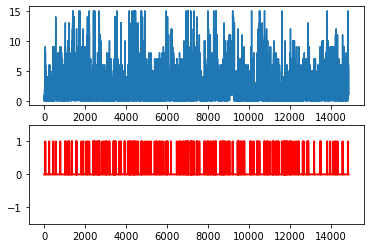

In [13]:
import numpy as np
import pylab


def init(x, lag, threshold, influence):

    labels = np.zeros(lag) 
    filtered_y = np.array(x[0:lag]) 
    avg_filter = np.zeros(lag)
    std_filter = np.zeros(lag)
    var_filter = np.zeros(lag)

    avg_filter[lag - 1] = np.mean(x[0:lag])
    std_filter[lag - 1] = np.std(x[0:lag])
    var_filter[lag - 1] = np.var(x[0:lag])

    return dict(avg=avg_filter[lag - 1],
                var=var_filter[lag - 1],
                std=std_filter[lag - 1],
                filtered_y=filtered_y,
                labels=labels)

def add(esult, single_value, lag, threshold, influence):
    previous_avg = result['avg']
    previous_var = result['var']
    previous_std = result['std']
    filtered_y = result['filtered_y']
    labels = result['labels']

    if abs(single_value - previous_avg) > threshold * previous_std:
        if single_value > previous_avg:
            labels = np.append(labels, 1)
        else:
            labels = np.append(labels, -1)

        filtered_y = np.append(filtered_y, influence * single_value
                               + (1 - influence) * filtered_y[-1])
    else:
        labels = np.append(labels, 0)
        filtered_y = np.append(filtered_y, single_value)

    current_avg_filter = previous_avg + 1. / lag * (filtered_y[-1]
            - filtered_y[len(filtered_y) - lag - 1])

    current_var_filter = previous_var + 1. / lag * ((filtered_y[-1]
            - previous_avg) ** 2 - (filtered_y[len(filtered_y) - 1
            - lag] - previous_avg) ** 2 - (filtered_y[-1]
            - filtered_y[len(filtered_y) - 1 - lag]) ** 2 / lag)  
    
    current_std_filter = np.sqrt(current_var_filter)

    return dict(avg=current_avg_filter,
                var=current_var_filter,
                std=current_std_filter,
                filtered_y=filtered_y[1:],
                labels=labels)

lag = 50
threshold = 5
influence = 0

y = df1['채팅수']

result = init(y[:lag], lag=lag, threshold=threshold, influence=influence)

for i in y[lag:]:
    result = add(result, i, lag, threshold, influence)

pylab.subplot(211)
pylab.plot(np.arange(1, len(y) + 1), y)
pylab.subplot(212)
pylab.step(np.arange(1, len(y) + 1), result['labels'], color='red',
           lw=2)
pylab.ylim(-1.5, 1.5)
pylab.show()

In [15]:
peak_result = result['labels']
peak_result

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
kdtm
df2 = pd.DataFrame(peak_result, columns=['Peak'])
df2 = df2.replace(0.0, "X")
df2 = df2.replace(1.0, "O")
df2

,Peak
0,X
1,X
2,X
3,X
4,X
...,...
14858,X
14859,X
14860,X
14861,X


# 처음5분, 마지막5분은 피크여도 제외함

In [ ]:
df_m[:300]['Peak'] = 'X'
df_m.iloc[-301:-1]['Peak'] = 'X'

In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random as rd
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot
from datetime import datetime, timedelta
import numpy
import datetime

# chat data statistics code 

In [2]:
data1 = pd.read_csv("903242294_merged.csv", encoding='cp949' )
data1

,Unnamed: 0,시간,시청자ID,채팅내용,하이라이트 여부
0,0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage,X
1,1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis,X
2,2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...,X
3,3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper,X
4,4,0:00:25,선홍빛하늘색,HeyGuys,X
...,...,...,...,...,...
79254,79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump,X
79255,79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...,X
79256,79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump,X
79257,79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...,X


In [3]:
df1 = data1["채팅내용"]
df1

0                                        BabyRage BabyRage
1                      NotLikeThis NotLikeThis NotLikeThis
2        FootYellow FootYellow FootYellow FootYellow Fo...
3          ResidentSleeper ResidentSleeper ResidentSleeper
4                                                  HeyGuys
                               ...                        
79254          BibleThump BibleThump BibleThump BibleThump
79255    BibleThump BibleThump BibleThump BibleThump Bi...
79256          BibleThump BibleThump BibleThump BibleThump
79257    BibleThump BibleThump BibleThump BibleThump Bi...
79258    NotLikeThis NotLikeThis NotLikeThis NotLikeThi...
Name: 채팅내용, Length: 79259, dtype: object

In [4]:
chat1 = df1.to_numpy()
chat1

array(['BabyRage BabyRage', 'NotLikeThis NotLikeThis NotLikeThis',
       'FootYellow FootYellow FootYellow FootYellow FootYellow FootYellow FootYellow FootYellow',
       ..., 'BibleThump BibleThump BibleThump BibleThump',
       'BibleThump BibleThump BibleThump BibleThump BibleThump BibleThump',
       'NotLikeThis NotLikeThis NotLikeThis NotLikeThis NotLikeThis NotLikeThis NotLikeThis NotLikeThis'],
      dtype=object)

In [100]:
id_uni = data1["시청자ID"].unique()
len(id_uni)

9336

### 어절 음절 낱글자 세기

In [5]:
    s = chat1[0]
    i = 0
    a = 0
    Ar = []
    for h in chat1:
        s = h
        tk = nltk.word_tokenize(s)
        a = len(tk)
        Ar.append(a)
#         i = i+1

In [7]:
Ar

[2,
 3,
 8,
 3,
 1,
 5,
 7,
 7,
 1,
 1,
 7,
 2,
 3,
 5,
 2,
 4,
 1,
 8,
 4,
 4,
 5,
 3,
 6,
 4,
 4,
 4,
 9,
 4,
 6,
 2,
 5,
 2,
 7,
 4,
 4,
 5,
 4,
 4,
 8,
 5,
 5,
 1,
 6,
 7,
 5,
 1,
 6,
 7,
 10,
 5,
 1,
 7,
 4,
 4,
 6,
 7,
 10,
 3,
 9,
 3,
 5,
 5,
 4,
 4,
 6,
 3,
 1,
 11,
 2,
 6,
 6,
 1,
 6,
 3,
 5,
 1,
 10,
 3,
 6,
 4,
 4,
 9,
 9,
 9,
 7,
 6,
 4,
 5,
 3,
 3,
 6,
 4,
 10,
 8,
 3,
 7,
 10,
 5,
 9,
 1,
 8,
 6,
 5,
 4,
 8,
 6,
 11,
 5,
 4,
 3,
 8,
 5,
 6,
 10,
 7,
 3,
 4,
 5,
 3,
 9,
 7,
 9,
 6,
 3,
 5,
 4,
 6,
 3,
 4,
 3,
 1,
 5,
 7,
 9,
 8,
 5,
 9,
 6,
 7,
 7,
 5,
 6,
 7,
 4,
 8,
 4,
 5,
 8,
 6,
 9,
 1,
 6,
 8,
 7,
 5,
 5,
 8,
 6,
 6,
 9,
 3,
 5,
 8,
 7,
 7,
 6,
 7,
 3,
 9,
 4,
 4,
 3,
 4,
 5,
 4,
 9,
 8,
 5,
 5,
 8,
 6,
 7,
 9,
 4,
 7,
 8,
 2,
 6,
 5,
 7,
 11,
 4,
 7,
 6,
 5,
 1,
 9,
 1,
 5,
 9,
 4,
 9,
 5,
 2,
 7,
 9,
 4,
 7,
 4,
 9,
 5,
 5,
 7,
 2,
 2,
 8,
 8,
 5,
 4,
 11,
 8,
 4,
 8,
 8,
 4,
 5,
 8,
 10,
 9,
 3,
 5,
 1,
 6,
 4,
 8,
 6,
 9,
 1,
 6,
 5,
 7,
 5,
 9,
 5,
 7,
 1,
 4,
 

In [8]:
df_uh = pd.DataFrame(Ar, columns = ['어절수'])
df_uh

,어절수
0,2
1,3
2,8
3,3
4,1
...,...
79254,4
79255,7
79256,4
79257,6


In [9]:
    ss = chat1[0]
    i = 0
    aa = 0
    AAr = []
    for h in chat1:
        ss = h
        a=ss.split(' ')
        result=0
        for i in a :
            result+=len(i)
        print(result)
        AAr.append(result)
#     i = i+1

16
33
80
45
7
50
70
56
7
5
70
18
24
50
16
28
10
48
40
48
50
30
30
12
40
40
90
12
60
20
50
14
49
28
32
50
40
44
48
25
50
7
60
70
73
7
36
70
74
50
9
70
60
36
60
42
100
30
90
30
50
50
36
40
48
30
11
110
20
60
90
5
60
21
50
7
30
30
54
40
20
54
72
58
70
60
40
50
30
30
60
60
100
80
27
72
100
50
90
6
56
60
50
40
83
60
110
50
40
30
77
50
60
100
70
45
24
50
33
90
70
82
60
27
50
40
48
30
24
30
10
50
70
90
80
50
90
6
21
70
50
36
70
40
80
40
15
88
6
60
10
48
80
70
50
75
80
60
60
90
30
50
80
70
70
60
70
30
72
40
40
30
40
35
32
101
80
50
50
80
60
70
90
40
42
104
2
47
50
66
153
40
70
60
50
5
90
7
46
90
40
90
50
16
70
90
28
70
12
90
50
50
70
20
12
40
80
50
40
165
76
40
80
80
40
15
88
80
88
30
50
5
60
40
56
90
135
7
60
50
56
50
90
50
70
10
12
62
150
2
30
70
120
48
60
70
80
40
40
60
90
63
80
60
50
30
50
40
80
40
30
100
70
30
100
50
60
60
60
10
40
40
18
50
82
35
50
70
70
40
40
70
100
90
56
40
80
40
70
30
60
66
28
40
18
40
60
42
100
70
80
60
40
50
28
44
25
30
90
90
80
80
60
45
20
60
100
30
72
56
90
50
40


1
16
7
11
5
1
12
7
72
1
3
1
9
12
11
1
5
3
21
12
7
4
6
1
5
5
3
5
1
3
9
8
22
2
1
36
9
9
7
23
1
15
6
2
5
1
1
10
1
2
6
1
1
5
1
19
13
2
2
2
2
5
1
6
4
6
4
1
1
17
1
6
3
1
80
8
8
3
1
1
6
1
1
2
5
1
20
2
1
14
9
4
1
6
3
1
15
13
4
11
3
1
2
1
5
8
25
2
14
1
1
1
1
4
3
29
6
13
10
3
13
6
7
12
3
13
3
1
3
1
1
7
5
14
1
10
15
3
6
8
2
2
2
1
3
5
1
1
2
9
5
3
9
7
11
10
3
2
2
1
10
5
4
3
3
4
7
10
4
4
13
1
8
13
8
14
7
3
11
4
5
20
21
5
12
17
12
11
8
8
15
13
15
2
12
23
1
14
7
3
2
4
12
5
1
7
5
10
7
6
14
6
1
18
1
4
21
8
11
11
12
2
3
5
12
1
14
7
13
15
12
4
3
3
40
12
2
15
2
6
3
11
4
4
4
1
3
7
4
8
4
10
29
2
10
8
13
6
14
9
3
3
9
1
2
8
1
20
11
28
8
4
6
1
13
11
14
11
20
4
12
16
11
3
8
5
9
2
10
14
9
9
3
4
6
4
7
13
6
7
4
20
4
10
10
10
5
54
3
8
7
1
10
7
3
1
20
5
20
16
15
7
4
4
26
5
4
3
6
12
11
12
8
11
7
12
8
14
8
5
15
4
15
1
9
11
9
1
8
6
4
8
8
3
6
11
18
10
4
5
9
17
28
1
1
11
7
12
9
3
2
6
11
28
9
20
9
9
5
9
13
3
2
2
9
1
9
8
11
9
5
5
2
4
10
5
6
4
2
2
2
2
6
4
2
9
2
4
7
4
4
3
2
2
2
4
14
1
13
7
2
2
2
2
2
9
2
4
5
2
2
5
12
7
5
26
2


4
2
8
13
12
33
15
8
9
11
12
9
34
36
8
8
13
16
5
18
8
1
3
12
4
4
7
6
2
5
9
12
11
13
12
8
10
3
4
21
6
7
1
10
11
5
1
8
12
14
3
10
2
1
24
2
12
4
1
3
13
9
1
1
1
4
1
1
20
5
1
28
2
1
3
6
1
5
8
1
10
1
3
1
1
15
1
4
8
1
11
4
8
1
10
6
6
9
1
5
10
3
5
3
4
5
1
4
1
1
8
6
6
4
1
5
6
3
1
10
14
3
4
5
6
8
1
7
1
1
4
1
3
2
4
2
1
11
2
2
10
10
7
6
7
2
8
16
4
4
4
6
3
13
4
6
6
5
3
3
3
2
7
3
3
23
1
8
7
5
3
2
8
8
6
3
3
5
1
3
41
3
1
5
3
4
5
13
4
3
5
6
3
8
3
3
5
3
5
6
3
1
12
4
2
1
5
5
5
3
4
3
4
7
3
3
5
7
3
5
9
8
7
6
5
6
6
8
9
5
4
5
5
6
13
5
5
5
5
7
3
3
8
8
3
11
10
5
3
9
1
3
3
13
3
6
9
8
6
17
8
16
5
13
7
5
5
3
9
9
13
8
5
20
4
1
2
4
7
7
8
5
11
3
6
1
8
6
4
11
3
3
1
20
6
1
8
1
14
22
11
9
4
8
7
1
1
1
1
1
10
9
6
7
1
8
8
12
7
9
8
1
1
1
17
3
1
7
1
4
9
8
1
13
8
6
13
4
1
9
7
7
1
17
10
5
15
6
9
4
21
4
30
7
5
7
8
4
3
1
12
7
4
5
4
1
11
31
5
20
17
1
19
4
7
3
8
10
5
15
6
8
12
7
4
1
3
10
13
1
10
7
6
11
9
9
1
17
4
8
7
33
7
4
8
11
14
5
12
12
10
8
13
11
14
4
16
36
25
5
5
5
5
8
9
14
15
3
4
5
1
8
3
15
7
6
4
6
13
10
33
6
8
6
7
8
2
6
6
4

4
10
5
13
8
12
10
10
5
17
6
13
5
27
4
3
5
6
17
14
28
10
19
9
12
40
12
21
12
9
5
11
14
69
2
8
5
6
11
8
7
22
9
11
27
5
5
19
7
15
23
14
5
14
9
12
15
1
13
12
10
15
16
40
11
11
9
8
10
13
7
7
4
3
13
13
12
3
17
9
26
13
15
4
7
14
12
6
26
8
13
10
7
12
3
9
30
9
9
22
9
8
9
8
11
11
14
20
11
15
30
16
12
9
8
8
31
17
17
16
8
3
4
12
13
24
5
14
16
9
7
11
23
7
4
24
3
14
3
5
22
10
13
12
11
10
7
10
23
3
30
14
7
14
20
16
11
11
4
3
4
9
27
8
5
19
9
16
20
22
12
8
8
13
2
16
32
16
18
5
21
6
16
8
7
17
12
16
10
9
21
6
1
12
13
6
25
7
1
30
21
16
14
30
13
12
11
19
15
16
11
15
17
23
14
11
5
21
33
25
16
6
17
11
16
24
15
12
15
27
40
6
12
6
13
15
18
4
17
15
19
10
13
6
2
3
20
14
30
14
6
11
25
34
18
21
16
26
8
6
22
10
15
18
13
9
15
7
25
15
16
10
17
7
4
14
13
24
15
15
7
6
27
11
7
9
8
12
2
8
17
16
2
16
30
7
15
6
11
9
11
7
46
6
2
7
10
5
9
14
5
17
13
13
16
3
8
13
12
14
15
8
5
12
16
10
7
9
6
9
10
10
10
7
8
8
10
6
16
12
14
13
8
2
9
11
4
16
6
14
6
7
8
13
17
5
2
6
60
25
11
2
19
8
13
2
4
4
6
12
10
8
5
6
3
4
5
6
8
12
6
10
10
6
7
12

1
1
1
12
10
1
16
1
1
45
8
2
11
5
1
1
1
5
2
6
5
10
1
1
8
7
6
8
1
1
4
6
4
1
7
1
1
35
4
10
1
13
8
10
4
21
1
24
1
20
23
10
8
9
7
3
2
42
35
5
9
4
10
7
4
12
6
12
8
23
12
6
3
3
5
6
7
9
6
5
5
17
9
9
5
19
5
3
4
3
6
1
24
7
12
17
13
3
5
14
3
17
7
5
17
4
17
2
7
8
16
6
13
12
3
11
9
9
5
20
3
5
27
19
10
1
20
14
10
15
3
3
3
30
13
5
3
9
18
5
6
6
3
9
5
8
10
16
5
13
5
5
14
10
12
9
11
25
10
15
10
6
6
10
5
8
8
5
2
17
9
25
12
13
12
5
16
33
27
4
18
9
15
8
48
24
2
8
7
3
18
9
15
13
16
8
9
5
20
10
8
5
6
15
3
11
5
11
22
5
10
31
26
33
18
7
9
3
2
9
23
11
10
9
18
12
7
7
11
11
7
20
4
4
2
13
5
7
5
5
3
7
11
6
11
9
7
20
13
11
7
4
40
32
13
12
5
8
9
13
10
14
9
17
7
7
7
10
9
15
38
3
14
8
17
11
11
11
7
13
7
6
12
20
9
6
23
9
3
8
10
11
5
27
4
27
8
8
9
49
7
7
19
14
17
8
11
8
10
8
9
11
6
3
10
7
6
9
11
6
4
11
9
11
5
10
16
6
10
9
25
3
9
7
17
13
11
6
19
14
6
15
6
5
16
5
15
11
2
14
14
5
32
22
4
2
10
8
9
10
15
22
10
12
5
4
21
4
20
20
11
19
15
11
13
8
7
11
17
11
19
5
8
15
12
7
18
17
7
15
4
5
6
8
10
14
21
4
8
9
17
30
11
4
14
6
8
9
7


1
8
12
6
2
5
14
10
5
3
2
16
20
5
17
21
1
6
9
35
8
16
24
9
6
18
3
3
2
4
5
12
22
14
4
11
7
6
24
6
3
4
8
1
9
6
10
3
6
3
4
10
12
11
4
12
6
11
10
9
5
10
5
13
9
8
4
28
7
9
7
4
3
32
4
4
9
32
5
5
5
3
9
16
9
8
5
4
4
2
2
6
4
15
8
8
5
4
18
9
5
3
4
15
4
4
3
4
23
1
37
3
8
4
5
3
13
6
17
12
6
1
5
4
8
9
6
4
4
7
9
6
4
4
8
24
3
8
5
4
5
4
7
7
3
3
4
4
6
6
6
10
5
5
6
11
1
7
2
5
4
1
2
7
9
1
24
1
4
4
1
5
1
20
45
5
9
30
1
11
8
1
1
1
6
6
1
1
3
2
1
3
3
1
1
4
1
1
3
1
1
1
2
3
1
4
1
1
47
8
1
4
1
1
9
6
1
1
1
4
3
1
1
7
3
1
13
1
20
1
1
1
8
1
1
8
1
28
1
1
17
11
4
15
8
8
1
6
9
5
10
14
1
8
24
7
1
12
3
1
7
1
4
4
1
5
13
1
17
1
11
1
15
13
9
24
19
16
2
11
2
1
10
7
10
12
11
5
12
1
11
9
1
1
1
5
1
1
15
5
14
33
5
90
1
10
1
6
8
10
6
15
8
5
6
6
1
6
3
6
7
1
3
11
8
1
8
1
3
11
5
11
36
1
14
9
1
6
3
6
1
4
5
5
5
13
7
6
1
10
13
4
4
8
5
7
7
5
5
4
7
8
10
15
4
1
14
5
6
9
19
4
4
20
4
5
12
50
3
5
7
4
3
5
4
1
11
6
6
7
17
10
11
6
15
4
4
6
8
10
6
4
5
4
11
7
4
3
4
2
5
19
10
7
8
11
11
9
7
5
1
4
4
7
12
6
16
6
5
19
5
40
8
5
10
6
1
6
18
5
6
7
5
9
10

14
5
2
7
6
3
3
5
6
14
8
4
6
1
49
4
6
4
8
8
6
5
10
5
10
8
7
5
3
9
3
6
6
9
9
5
3
8
11
8
10
10
24
17
12
17
6
9
15
32
5
3
16
31
20
2
26
30
21
31
15
11
29
15
13
9
17
7
30
20
15
5
15
5
16
6
14
9
13
12
31
10
15
14
18
9
7
34
8
14
6
20
30
21
7
9
10
8
19
11
8
14
14
37
6
8
7
12
11
22
5
14
4
23
5
3
18
16
20
15
6
3
30
4
14
3
5
4
11
14
39
21
6
7
12
13
12
5
7
18
4
12
6
6
17
10
6
19
5
14
7
11
5
15
3
3
6
9
13
2
5
3
3
5
3
4
6
3
5
4
5
5
3
5
1
5
16
7
3
12
2
4
3
3
4
3
6
3
9
4
6
5
9
6
1
9
4
3
8
5
14
5
7
3
6
7
3
4
3
5
5
3
4
5
3
6
3
5
3
4
4
3
24
6
8
3
3
7
3
5
3
7
6
3
6
14
2
5
2
3
5
3
15
9
3
3
5
24
3
7
7
7
3
3
3
5
3
3
5
7
6
7
4
11
5
5
12
3
7
3
3
10
10
8
16
15
14
7
9
6
5
2
3
4
3
4
4
5
6
5
6
5
3
7
4
3
6
6
5
5
18
4
6
10
5
1
5
7
7
3
5
9
3
8
9
7
3
3
4
4
3
9
3
6
6
4
5
12
6
7
27
3
9
6
4
9
15
8
50
4
9
15
6
7
6
10
36
7
3
4
10
7
3
3
28
8
7
3
4
6
7
3
5
5
5
4
3
4
3
4
1
16
7
6
3
3
5
1
3
6
14
10
4
4
1
2
10
6
1
3
4
5
6
6
4
3
7
7
3
4
1
9
9
4
1
3
7
1
8
5
1
2
4
4
5
4
1
1
1
3
4
1
1
4
1
7
1
5
1
1
3
1
1
4
1
1
3
2
1
3
26
4
6
1
1
2


24
15
1
8
2
11
20
12
9
18
7
14
1
1
6
12
8
1
11
17
20
10
5
13
3
10
1
14
6
18
10
14
17
11
15
9
1
1
32
1
8
12
29
4
2
18
7
15
12
1
7
12
2
1
2
7
2
1
6
7
9
7
6
3
11
1
4
4
2
11
12
11
5
10
1
16
1
17
3
14
8
16
8
5
10
4
11
12
11
15
10
6
3
6
5
13
10
23
1
6
1
8
8
20
4
28
3
20
13
4
12
4
3
17
1
3
2
1
21
2
3
10
3
7
7
1
3
11
5
23
3
1
2
2
2
7
3
3
5
1
2
2
4
3
5
1
17
2
6
3
2
8
8
2
9
1
4
7
5
7
1
8
2
1
11
4
1
22
7
2
6
8
4
3
18
1
2
8
3
8
4
7
11
11
9
1
6
9
2
4
2
1
1
1
1
7
1
2
1
1
3
16
2
3
5
14
2
1
2
1
5
1
1
1
1
4
1
1
1
1
1
1
2
1
1
1
2
1
1
12
2
1
1
3
4
1
10
7
5
5
1
3
5
8
31
19
1
4
2
24
4
2
1
2
11
5
5
12
4
10
15
3
4
8
2
6
8
4
3
5
10
1
7
7
2
11
2
5
3
10
7
14
5
19
8
3
5
8
10
6
5
9
6
5
6
6
3
1
2
1
1
1
10
3
1
1
1
1
1
1
1
1
20
1
1
1
1
3
1
5
1
2
4
1
2
1
5
4
19
7
1
19
10
1
11
2
1
6
1
2
1
3
1
6
1
12
10
1
10
11
29
1
14
4
1
3
2
10
3
16
1
5
4
1
4
2
3
12
6
5
15
13
14
7
3
5
1
12
11
4
12
6
5
6
8
1
2
7
2
7
1
9
8
7
10
6
8
11
8
1
6
10
19
6
7
4
1
12
3
5
9
14
6
8
3
3
7
21
17
8
15
12
15
4
6
4
1
24
4
14
1
7
2
10
13
17
4
7
6
17
9
1

13
14
9
9
8
2
7
8
18
12
14
6
7
17
5
11
6
37
24
13
7
5
14
5
2
7
11
4
6
1
1
9
7
9
7
6
6
13
6
1
1
3
16
1
7
1
1
1
6
13
1
3
2
2
2
2
2
1
10
3
3
4
7
4
1
2
1
21
1
1
1
9
2
3
5
6
1
2
2
3
7
12
6
1
4
3
8
2
5
15
2
4
4
13
3
2
1
1
1
1
12
1
9
8
6
4
4
5
2
1
1
12
1
1
2
1
18
5
10
2
1
1
10
3
1
1
1
1
4
10
1
8
10
9
11
3
9
1
11
9
1
1
14
3
14
1
17
18
1
1
1
2
13
2
4
11
7
1
12
9
13
29
1
2
19
5
2
4
7
8
9
4
9
4
8
4
19
12
40
12
15
18
10
4
7
20
7
11
9
16
11
14
6
10
4
2
5
1
19
18
2
10
28
31
10
14
11
14
8
20
12
7
6
26
5
4
11
2
10
3
16
5
4
4
12
3
3
31
6
6
37
5
23
17
5
12
3
11
1
3
4
3
6
3
3
20
6
10
3
21
5
10
11
9
12
10
6
7
4
4
9
7
30
8
3
20
6
5
8
4
3
4
1
3
6
11
5
10
2
5
15
4
14
12
3
8
6
6
8
3
7
11
3
3
5
7
3
3
3
9
3
11
7
6
1
3
4
4
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
25
3
10
3
1
3
3
3
7
3
3
4
12
2
3
7
3
3
3
3
5
6
9
5
10
3
3
6
3
37
8
7
9
3
13
8
7
6
3
14
14
3
5
3
3
10
17
6
9
12
12
3
18
7
5
7
43
2
9
10
9
1
11
7
13
6
1
17
12
4
3
17
3
7
5
21
6
6
20
18
1
4
7
3
5
8
3
6
2
9
8
7
21
18
9
8
16
10
11
4
11
12
1
1
35
7
10
7
24
3
6
10


13
8
14
11
11
4
7
5
11
8
7
6
3
9
6
20
8
5
4
20
2
14
16
1
4
7
5
5
16
1
8
9
1
6
15
11
3
4
4
16
1
4
9
7
6
11
11
4
3
4
9
2
23
3
1
7
6
3
5
4
2
14
27
9
2
2
7
4
7
4
5
12
5
5
2
11
19
12
12
7
5
6
6
25
9
6
3
6
7
6
10
11
19
6
9
18
11
7
6
8
1
5
3
6
7
16
3
48
8
11
8
8
8
3
6
2
6
11
27
22
10
8
3
13
4
9
6
7
4
3
6
12
25
4
1
19
7
1
6
17
1
37
6
7
14
6
1
3
10
3
37
1
1
15
1
1
4
1
8
10
10
8
9
15
17
3
10
9
11
5
11
18
7
5
4
6
6
8
12
5
15
9
14
14
6
10
11
4
12
10
13
8
8
11
2
9
1
2
3
2
20
4
2
2
8
6
8
2
6
2
11
9
2
4
11
13
17
9
6
14
5
1
7
8
20
33
22
13
12
11
13
18
10
12
14
12
14
13
6
14
6
20
19
4
27
12
38
26
14
10
5
17
32
12
13
6
11
9
18
18
18
28
15
9
10
3
13
14
6
14
15
14
8
10
27
12
12
10
12
6
5
7
2
1
5
27
12
13
6
10
16
29
16
13
28
2
13
12
8
14
4
16
5
6
3
12
14
7
10
6
13
11
6
4
22
10
9
12
13
8
11
8
12
4
18
5
3
12
8
11
9
7
6
2
16
9
12
18
8
6
5
22
20
12
2
19
17
6
16
10
9
10
3
5
8
10
5
1
18
1
1
3
2
1
1
3
4
2
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
6
1
3
1
1
1
1
1
2
6
1
6
2
3
4
1
27
4
4
1
1
11
2
6
2
4
11
2
5
5
8
29
4
1
7
11


7
4
4
4
2
15
7
14
12
2
13
4
9
8
6
6
4
5
6
9
3
16
24
12
50
11
4
2
4
5
13
11
8
11
11
16
8
4
2
2
5
4
11
13
9
5
14
13
4
12
17
5
16
7
40
12
6
11
8
13
9
4
10
9
3
10
12
5
12
6
17
3
27
13
3
12
6
4
14
3
3
9
22
12
10
3
12
16
15
15
16
5
12
6
2
7
12
10
19
7
2
8
7
14
15
5
15
9
16
20
8
5
13
12
17
5
9
7
10
7
17
11
60
8
8
10
56
11
9
11
8
21
9
2
3
3
9
10
12
19
9
4
8
4
28
6
5
15
6
5
10
8
6
5
7
8
4
4
6
3
14
12
12
18
6
26
10
4
2
7
12
14
7
8
11
1
12
12
2
11
14
15
5
6
8
1
12
17
11
21
18
4
20
1
1
12
2
11
10
1
12
2
5
18
4
1
3
6
2
16
33
18
2
14
3
5
1
4
4
2
3
12
2
2
1
10
23
5
1
4
5
4
17
4
4
6
8
2
3
10
4
3
6
11
12
2
14
2
14
18
8
5
14
6
26
3
2
4
4
3
12
21
18
3
17
2
5
16
13
5
12
2
14
9
23
13
14
4
4
5
15
5
1
4
7
2
25
48
3
5
9
12
21
13
3
5
4
32
11
2
70
8
11
8
7
4
46
11
11
5
9
11
2
6
6
18
2
16
9
7
21
5
4
18
12
2
26
11
13
30
25
6
12
4
22
10
8
10
11
14
6
3
5
19
16
6
27
40
7
10
7
8
8
19
4
6
6
11
14
14
63
13
4
7
17
4
8
9
32
16
6
5
11
10
5
28
15
8
30
34
3
5
5
10
11
36
6
10
6
11
5
22
13
1
2
5
12
14
13
16
13
4
3
10
32
24
30

4
2
7
7
11
11
5
4
4
3
6
8
4
5
17
2
13
4
3
3
10
11
3
10
13
10
4
4
10
8
5
15
6
8
5
13
13
8
9
9
10
5
13
5
11
5
12
3
1
11
10
3
19
7
9
10
2
6
7
14
13
2
7
15
12
8
6
10
18
6
7
1
23
5
12
7
10
8
2
13
12
10
13
14
3
15
5
10
7
8
9
17
4
7
6
6
11
3
9
11
10
4
5
7
6
1
11
6
3
6
2
9
6
9
15
6
9
15
9
19
7
1
15
4
6
15
16
2
30
7
3
9
5
7
6
7
7
5
11
9
10
22
12
6
14
11
9
12
8
40
6
16
1
10
15
5
2
12
5
10
14
15
10
11
17
4
1
15
12
4
6
9
16
1
7
4
4
13
2
4
9
6
1
1
7
8
18
15
7
4
18
16
1
9
14
10
4
2
4
13
14
5
7
5
4
9
3
9
3
13
4
14
6
4
15
10
2
4
4
6
16
9
2
7
10
2
5
3
6
15
5
9
13
7
12
4
6
4
12
5
2
5
11
6
4
5
13
4
3
11
1
6
2
3
8
4
12
1
15
5
4
5
10
4
2
4
6
2
5
6
5
3
13
16
2
11
3
5
5
8
4
1
1
3
6
1
9
2
1
11
6
7
4
3
1
9
5
1
12
5
3
8
14
9
8
1
4
8
1
8
4
3
9
3
8
7
4
4
4
1
29
16
1
7
1
17
11
4
12
12
11
9
1
11
1
12
6
14
6
9
8
15
4
12
10
7
3
9
3
23
10
18
20
18
1
18
8
24
2
17
3
12
6
9
3
8
8
8
22
8
9
7
10
2
12
6
40
11
6
5
4
9
6
4
8
6
3
7
5
12
24
9
4
5
6
12
1
2
8
1
10
2
2
5
4
10
7
1
4
3
2
2
13
6
19
2
3
1
7
1
1
1
1
2
13
3
4
7
1
2
1
1


11
16
17
16
2
11
5
28
8
1
30
8
9
10
1
8
5
18
15
6
16
12
9
4
8
6
4
4
11
21
3
8
11
14
9
6
7
2
6
9
6
20
13
6
10
9
5
7
6
9
14
14
13
9
6
1
7
3
5
5
13
11
6
17
8
8
6
1
3
3
3
4
9
6
6
5
5
8
4
8
5
1
31
2
6
2
1
1
1
1
3
6
4
3
3
1
7
8
5
4
4
6
4
11
4
3
11
13
15
4
2
1
3
12
3
13
6
5
1
11
3
3
10
2
3
3
5
5
8
3
9
3
3
5
4
8
14
3
8
4
7
7
9
6
9
4
4
3
1
15
3
10
3
9
3
5
6
5
5
2
3
3
15
1
5
2
17
5
2
5
5
7
7
5
2
2
7
14
6
12
5
6
5
5
1
5
8
11
9
8
6
11
8
6
5
6
12
8
6
4
14
2
11
14
3
12
15
4
2
9
1
7
8
5
9
9
4
9
4
1
4
1
12
2
30
4
8
2
3
1
3
14
4
5
6
18
8
5
45
5
1
8
2
12
12
6
5
10
1
6
1
14
3
13
10
2
4
6
6
11
2
4
1
9
1
9
5
1
1
3
1
1
6
2
6
1
8
5
1
3
1
4
1
1
1
1
1
1
2
1
1
22
1
1
3
1
5
1
12
1
1
4
1
7
1
1
1
9
12
1
1
1
1
3
4
8
3
6
5
1
1
10
1
10
10
5
4
1
8
1
1
1
5
1
5
20
12
8
8
1
7
1
1
11
10
1
15
1
10
11
1
5
1
1
2
6
8
1
1
1
12
1
2
14
2
11
5
1
1
10
8
3
8
3
9
5
5
7
8
2
9
4
14
2
8
9
3
7
9
12
4
6
10
11
11
2
2
1
1
13
2
1
8
2
1
1
2
2
1
1
1
12
2
1
11
1
4
1
1
6
1
1
2
3
3
1
19
3
5
6
5
1
8
7
12
7
3
2
1
1
8
6
9
4
4
13
9
5
10
8
10
2
8
1
4

4
2
2
3
11
1
1
1
7
2
6
11
2
10
6
4
8
9
2
10
13
6
2
13
4
9
14
8
5
2
4
10
10
6
13
9
22
3
8
4
11
4
3
8
18
5
7
11
3
3
7
6
6
5
19
5
3
11
5
9
3
17
7
7
5
8
6
7
14
6
6
4
4
6
8
24
3
5
6
3
14
21
19
1
3
5
4
20
8
6
10
17
9
10
5
9
4
20
8
11
10
10
4
10
2
1
4
1
7
2
17
5
13
8
1
1
1
3
1
1
10
1
1
1
1
1
1
1
3
11
4
1
1
8
6
1
5
3
10
6
9
5
12
2
6
13
6
7
1
1
5
5
4
3
6
15
6
6
3
2
1
1
8
17
9
5
8
6
7
6
11
4
9
1
4
2
17
8
2
3
7
3
5
9
5
4
9
1
6
4
11
4
4
16
8
8
63
5
10
6
6
12
10
5
11
4
11
4
4
4
10
5
11
16
4
9
19
9
4
28
4
4
14
10
19
5
4
4
11
4
4
9
8
5
9
7
4
8
9
4
8
16
11
14
12
4
9
22
1
2
2
1
1
18
4
9
6
3
4
11
5
9
5
4
8
9
16
4
3
5
15
8
9
14
1
5
72
4
4
6
7
22
17
9
9
4
5
7
1
11
22
4
10
2
1
11
8
5
19
1
10
2
8
5
5
3
12
7
5
5
7
13
12
23
7
6
15
9
3
2
1
2
2
1
2
2
2
1
2
1
2
1
1
2
2
1
2
2
2
1
2
2
1
2
2
1
2
2
1
4
2
7
10
1
7
2
1
1
1
2
11
4
1
1
1
5
1
1
5
6
1
1
1
1
1
1
2
1
2
3
1
5
2
7
3
4
4
2
4
9
9
1
8
5
1
12
10
10
18
5
6
20
4
7
1
1
12
19
5
4
1
1
1
1
1
2
1
1
1
1
16
1
7
2
4
2
2
1
5
6
9
1
10
7
1
1
5
6
1
4
2
2
1
3
2
5
2
1
3
3
8
4
7


3
2
3
14
5
10
9
10
7
13
9
6
14
10
10
9
4
16
13
13
8
11
7
10
12
5
11
5
11
9
13
6
14
1
8
18
8
15
2
9
1
1
7
6
2
5
4
12
4
6
6
8
1
2
8
5
7
10
16
7
1
8
3
19
4
5
3
3
3
4
13
12
4
24
12
11
9
8
4
6
9
4
7
10
11
6
4
18
10
13
16
2
2
6
4
4
9
1
10
1
1
9
1
1
1
4
2
1
1
7
3
9
1
1
1
6
1
2
1
1
7
5
9
3
11
2
5
2
8
4
4
2
3
1
4
1
1
13
5
3
5
2
8
4
13
6
5
2
1
1
1
2
6
5
4
11
2
1
2
20
13
16
5
21
2
3
5
5
14
19
5
9
20
6
5
1
5
5
4
2
7
1
36
10
6
2
11
4
17
11
5
3
7
2
7
11
5
12
3
5
5
10
6
13
4
5
44
3
4
3
3
6
8
10
6
6
6
16
7
30
5
3
13
7
5
5
13
10
3
13
5
2
7
6
5
4
12
7
9
15
20
11
8
10
4
19
4
9
8
4
5
14
14
6
11
9
11
25
4
5
4
3
4
6
5
6
6
13
4
4
3
2
4
12
5
6
15
6
4
5
5
10
4
6
5
4
15
3
10
9
9
6
7
4
4
1
4
10
4
4
5
7
7
8
7
2
10
4
21
2
2
7
8
6
15
4
11
5
11
8
4
10
9
2
3
12
20
2
1
7
7
4
6
7
8
3
10
9
7
2
15
9
4
4
2
7
3
4
11
7
14
8
1
5
3
26
6
14
4
6
1
2
1
1
1
4
1
1
6
1
1
1
1
1
1
2
3
1
1
1
1
1
1
2
1
1
48
1
3
1
1
2
1
1
1
24
1
1
1
1
24
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
4
1
1
2
10
4
10
1
5
2
1
3
45
1
4
1
2
1
15
1
8
1
5
5
1


9
6
16
12
4
1
11
13
6
13
6
11
10
8
5
6
21
21
2
11
9
1
13
9
1
18
10
7
18
2
4
1
3
6
7
1
13
9
3
1
4
1
1
11
5
1
12
12
3
8
9
1
16
10
2
3
3
1
13
11
1
14
13
8
9
1
7
1
1
6
1
17
4
3
13
10
19
4
8
10
11
8
8
8
3
5
5
14
13
2
3
6
18
9
39
12
7
8
6
4
7
13
15
5
15
15
18
10
4
27
5
6
12
5
15
8
11
15
2
3
2
6
5
17
4
1
3
12
11
1
15
15
6
7
6
13
4
23
10
13
9
2
9
7
9
3
4
8
6
9
7
15
4
9
2
5
19
20
6
17
13
4
20
2
4
11
5
13
4
3
3
4
4
11
8
4
9
9
4
8
8
1
2
2
4
19
7
22
8
8
14
3
12
2
1
4
17
1
2
2
7
1
6
6
8
2
11
5
8
5
10
10
7
11
2
15
2
2
16
17
1
4
8
5
1
9
23
5
4
1
27
3
8
1
2
5
10
25
24
3
13
7
12
1
6
21
13
3
8
1
4
5
1
6
5
8
14
1
9
7
1
5
1
2
18
11
1
15
2
11
17
24
7
6
8
8
23
2
4
13
4
17
1
2
2
6
11
1
4
16
1
14
2
1
1
2
8
4
8
1
8
7
3
4
6
3
4
7
15
1
45
6
1
14
34
7
28
6
1
1
3
11
6
12
10
20
8
15
7
4
5
4
8
8
8
9
8
7
9
5
16
3
5
3
6
3
5
2
10
12
3
2
16
8
12
14
2
7
10
29
7
9
2
2
8
9
2
12
3
3
2
3
4
4
2
2
2
5
5
9
9
9
11
2
12
8
1
12
2
10
12
19
28
12
9
4
7
5
5
11
10
2
7
29
5
9
9
4
5
13
6
6
10
6
8
12
5
14
11
9
3
9
13
15
7
9
5
5
8
4
6
7
1

8
7
2
6
19
4
2
8
12
2
4
7
7
7
2
9
1
9
9
14
6
5
13
7
15
10
11
17
10
8
10
11
13
15
6
9
9
4
1
5
10
9
5
3
2
9
3
3
3
3
18
6
10
16
12
7
7
7
2
7
6
8
3
5
17
14
7
5
9
14
8
7
10
9
3
20
8
4
8
4
1
9
17
5
9
5
11
4
4
8
3
10
16
13
19
16
8
1
13
9
2
2
1
20
3
8
1
15
13
1
10
1
7
2
1
1
10
21
4
2
1
7
5
10
5
1
1
6
3
30
2
8
6
6
4
12
3
6
4
6
5
4
11
6
1
3
4
1
4
2
7
3
8
22
5
18
6
8
2
10
6
2
4
8
2
4
1
4
1
2
7
8
4
16
8
4
15
4
4
6
4
12
1
15
4
2
3
1
4
4
2
3
2
11
4
5
14
25
8
4
6
4
1
10
6
4
4
4
1
13
17
1
6
9
14
3
18
18
7
10
18
9
35
10
6
15
9
10
2
5
3
36
15
1
1
11
32
9
16
1
14
6
4
7
9
10
9
8
9
10
17
6
25
14
7
13
13
16
8
5
10
12
23
2
33
11
8
10
9
16
4
18
7
9
11
8
17
10
17
8
5
2
2
8
2
19
8
13
4
12
6
26
6
19
9
2
13
12
15
17
5
9
8
26
5
9
14
16
16
12
16
7
4
6
14
7
12
27
8
7
7
10
1
12
19
9
9
12
10
3
4
2
14
7
11
10
21
20
14
5
5
10
8
5
10
29
3
7
5
21
15
9
10
5
6
12
4
23
10
4
2
8
6
7
20
5
8
4
14
3
11
7
6
5
11
5
13
10
3
3
5
5
3
14
2
6
3
6
4
2
11
5
5
7
3
11
1
18
8
5
12
12
5
9
6
3
8
4
3
7
7
10
4
3
23
6
14
1
8
7
3
3
10
17
13
7
10


4
4
2
14
11
7
4
7
3
7
5
5
12
11
6
8
5
2
6
7
8
11
4
6
2
5
6
4
2
16
5
6
8
4
8
5
2
7
6
10
11
4
10
7
9
11
5
18
18
9
1
4
12
5
5
8
14
2
9
6
6
5
1
10
5
16
14
10
16
8
6
2
1
27
8
4
6
14
4
10
15
1
10
34
2
2
2
2
16
4
1
2
10
2
2
2
4
5
8
11
2
1
2
8
5
1
8
1
4
11
21
2
1
2
4
1
1
9
11
8
12
3
5
11
10
11
7
12
6
2
20
15
16
8
3
16
4
1
2
7
1
1
1
4
10
3
30
1
16
2
14
6
4
2
23
6
6
10
10
3
1
7
19
10
12
2
6
13
11
3
15
20
15
2
4
2
3
8
5
6
14
5
5
7
8
6
4
4
5
16
3
7
7
15
3
14
14
13
7
19
6
6
6
3
3
8
2
15
8
6
4
11
6
5
1
6
12
20
14
13
3
10
3
3
25
5
10
11
5
7
5
14
9
20
7
3
11
10
5
13
19
2
4
6
9
8
6
4
17
15
7
11
22
3
5
9
7
3
7
12
4
12
6
13
13
11
10
13
2
3
9
5
12
9
10
12
6
2
2
5
2
2
2
5
3
5
12
3
2
3
5
2
2
3
5
3
2
3
7
4
2
4
2
2
3
3
4
3
3
4
4
5
2
5
3
3
7
4
3
6
4
3
7
10
2
2
3
3
2
2
2
14
10
12
5
11
5
3
4
6
3
2
3
3
2
2
6
10
5
8
3
1
2
6
5
5
3
2
14
3
3
7
2
2
3
4
3
4
4
2
14
2
3
6
2
5
6
2
8
3
3
3
3
3
6
2
3
3
2
2
4
6
5
3
4
3
3
6
2
7
4
11
2
4
3
11
5
5
2
2
3
8
9
9
2
2
7
8
11
6
3
2
7
10
1
12
4
10
3
2
2
4
11
5
2
7
19
6
6
4
3
6
7
4
13


5
4
2
2
33
3
7
6
2
3
5
7
48
1
3
6
8
6
13
6
11
1
3
2
5
5
1
6
1
7
5
8
17
1
17
6
12
4
5
5
8
4
12
9
11
5
13
2
16
7
11
7
3
12
11
11
12
5
23
14
9
22
13
20
3
50
30
13
10
6
14
5
18
5
6
3
12
11
13
7
12
9
5
3
17
28
6
5
10
6
9
7
3
5
11
8
5
5
12
7
50
18
7
4
12
1
10
4
1
14
7
16
11
12
8
9
10
3
3
16
8
6
13
12
3
4
50
18
8
2
3
6
6
5
3
5
8
8
11
6
3
3
14
4
3
1
3
3
2
4
2
15
7
5
2
2
40
15
1
8
2
4
14
1
10
2
3
5
2
23
5
2
12
3
1
1
24
5
9
2
5
3
5
1
4
19
8
5
1
16
4
16
43
40
40
40
30
70
40
50
33
30
50
40
40
40
60
55
80
35
30
40
40
30
24
56
70
70
70
80
60
40
10
70
50
24
48
40
60
80
60
60
30
70
10
60
36
64
30
30
50
60
50
30
100
45
54
40
110
30
60
40
70
40
60
88


In [10]:
df_um = pd.DataFrame(AAr, columns = ['음절수'])
df_um

,음절수
0,16
1,33
2,80
3,45
4,7
...,...
79254,40
79255,70
79256,40
79257,60


In [11]:
import re
com = re.compile('[ㄱ-ㅎㅏ-ㅣ]')

In [12]:
sss = chat1[0]
i = 0
aa = 0
single = []
for h in chat1:
    sss = h
    res = com.findall(sss)
    w = len(res)
    print(w)
    single.append(w)
#     i = i+1


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
4
21
5
11
5
8
0
0
1
10
0
9
0
13
2
0
1
0
0
0
0
0
7
1
6
0
5
0
0
2
0
3
0
4
1
0
4
29
0
2
0
0
2
10
6
0
3
7
0
0
2
0
2
11
15
8
4
0
0
0
11
0
3
9
0
12
0
0
0
3
2
2
0
6
14
0
0
0
0
4
0
7
4
2
0
0
0
0
10
0
0
0
0
0
0
0
0
0
3
0
0
20
1
20
16
12
4
0
0
0
0
0
0
2
4
0
3
0
4
0
0
0
0
2
0
0
0
8
0
9
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10
0
3
0
0
0
0
2
0
0
0
0
0
2
0
0
0
0
0
0
0
11
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
1
0
4
14
0
7
0
0
0
2
0
0
0
0
0
0
0
0
2
10
0
5
26
0
0
0
0
11
6
0
0
0
0
0
0
0
18
15
7
2
0
0
13
14
0
0
0
0
0
0
0
0
0
10
0
7
7
0
0
0
0
0
0
0
13
0
0
10
15
0
17
0
0
9
0
2
0
25
22
0
0
0
0
0
2
0
0
0
0
0
0
2
0
10
0
0
0
3
0
0
0
0
0
0
0
8
0
12
1
8
0
0
0
2
0
5
0
0
11
0
0
0
0
3
0
13
0
0
8
0
4
0
12
0
2
0
0
0
0
0
0
3
4
0
11
2
0
7
5
0
0
0
0
0
12
13
3
5
1
4
0
8
3
2
7
0
0
0
4
2
0
0
0
3
0
5
0
30
0
0
4
20
0
4
0
2
0
2
0
0
0
0
2
9
0
4
11
0
0
15
0
0
0
0
0
0
0
11
0
0
0
0
6
2
0
0
0
18
27
0
0
11
0
3
14
0
0
7
0
0
0
0
0
0
0
0
0
0
0
2
0
0
3
1
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
18
0
0
0
0
0
0
0
0
0
7
0
4
12


0
0
0
0
0
0
0
0
0
0
2
0
2
0
0
3
0
0
0
0
0
0
3
0
0
2
0
0
2
0
0
0
5
0
0
10
0
0
2
0
0
0
13
0
0
0
5
3
0
5
12
0
0
4
0
0
0
0
0
13
0
0
0
0
0
0
0
3
2
0
0
0
0
6
0
0
0
0
0
0
0
0
0
1
0
6
0
7
0
0
0
4
0
0
0
0
0
0
0
7
2
0
0
0
0
0
12
3
9
8
0
0
0
14
2
0
0
0
0
0
0
0
2
0
1
0
0
0
3
0
7
0
12
3
0
0
0
2
0
21
0
30
0
0
0
0
0
0
0
12
0
0
0
0
0
0
27
0
20
0
0
19
4
7
0
0
0
0
15
0
8
12
0
0
0
0
0
0
0
0
2
0
0
0
4
0
0
0
6
0
27
0
4
2
0
0
2
0
0
0
2
4
11
14
0
13
0
0
0
0
5
5
1
2
14
15
0
0
5
0
0
0
0
2
0
0
6
0
2
0
0
0
0
0
0
0
0
2
0
0
0
3
0
4
8
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
7
4
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
8
0
0
0
0
0
0
0
0
27
8
0
0
6
0
0
0
0
0
0
0
0
0
6
0
0
2
0
0
2
0
0
0
0
2
0
8
0
17
4
0
8
0
0
0
2
0
3
12
2
0
3
0
2
0
0
0
0
7
7
0
0
8
0
0
0
0
0
12
2
5
0
4
0
0
0
35
4
0
0
0
41
9
3
0
2
1
0
5
0
7
3
14
0
0
0
0
0
0
0
8
0
2
0
0
4
0
8
11
13
23
2
0
13
13
0
0
0
0
10
3
0
12
10
4
0
0
10
17
0
3
0
1
2
28
0
9
3
12
0
0
27
0
2
13
15
19
20
11
11
12
18
2
22
0
1
6
0
40
0
25
18
20
15
0
11
4
12
15
11
0
31


7
0
10
2
0
10
3
15
0
0
0
6
11
6
0
0
10
0
5
2
7
20
10
4
6
0
0
0
0
4
4
12
7
0
4
6
23
0
4
4
2
4
2
0
4
2
2
4
4
10
10
7
3
4
4
0
0
0
7
4
0
0
7
3
4
0
1
9
0
6
0
0
0
4
1
0
4
0
11
0
0
7
0
9
0
4
0
4
0
2
0
0
4
0
2
8
8
2
8
0
0
0
0
16
3
0
0
4
3
0
0
0
2
0
6
2
7
0
2
0
17
0
0
0
0
0
0
0
2
0
0
2
0
0
0
0
0
0
3
2
0
0
2
3
0
28
0
0
0
0
2
2
0
0
0
0
6
2
0
0
0
2
0
2
0
0
0
5
0
0
9
5
0
19
0
0
0
0
0
0
0
5
0
0
0
0
0
0
0
0
0
0
0
0
0
11
0
0
2
0
0
2
0
4
0
0
0
0
0
0
0
0
0
0
0
0
11
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
5
0
0
0
0
0
0
12
0
0
0
0
0
0
0
2
5
2
0
0
0
0
0
0
0
6
0
0
0
0
0
0
4
4
0
0
10
3
0
7
3
5
0
0
0
0
0
0
0
0
0
12
0
0
5
2
0
4
1
0
0
0
0
0
0
2
0
2
0
0
0
10
4
6
0
0
3
0
0
0
0
0
0
2
2
20
9
2
0
0
0
0
0
0
0
0
0
0
0
2
3
0
0
0
0
0
0
3
2
6
0
0
0
0
0
0
0
0
0
0
4
0
2
0
0
0
5
0
0
10
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
25
0
0
10
0
0
4
0
1
0
2
0
0
2
0
0
4
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
11
3
0
0
0
0
1
2
0
0
7
13
8
8
0
0
1
0
0
0
0
0
2
0
10
0
0
2
0
0
0
2
0
2
0
7
7
4
0
0
0
0
1
3
7
10
0
6
0
23
0
2
0
0
0
1
0
0
12
0
0
0
0
0
0
0
13

18
0
5
13
14
0
0
0
4
13
25
0
8
0
0
0
0
7
0
0
2
4
2
11
38
8
0
13
26
0
0
0
0
0
0
2
4
0
0
0
15
0
20
13
4
6
4
11
0
0
0
13
0
11
0
0
0
0
0
0
15
34
9
8
2
0
0
3
0
0
0
0
12
0
0
0
2
8
0
20
0
0
0
9
10
10
5
0
0
0
0
27
0
0
0
10
12
0
0
18
17
0
25
0
0
0
10
11
0
4
0
10
16
11
1
0
43
0
0
11
0
13
0
0
18
0
10
19
16
2
0
5
2
2
13
0
23
2
0
4
0
11
0
0
0
13
0
0
0
10
21
0
0
15
0
4
0
0
0
0
0
0
26
13
6
0
22
2
12
0
0
10
23
0
0
0
0
0
0
14
25
14
0
5
18
0
0
0
2
0
9
9
9
13
12
0
0
0
0
0
12
0
14
2
9
0
21
14
2
10
0
0
10
0
0
0
20
0
0
30
0
0
2
5
8
1
0
39
0
0
12
0
0
3
0
0
11
20
6
24
16
0
0
0
15
17
0
0
3
0
16
16
0
0
2
15
5
0
25
0
0
8
0
10
0
11
5
0
14
0
11
0
0
0
0
0
0
16
0
0
0
17
2
0
0
0
0
0
0
0
0
0
0
0
0
0
4
0
0
0
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
14
14
0
0
2
3
24
4
0
14
5
7
0
12
13
11
0
6
0
0
0
3
0
24
15
0
0
0
1
0
8
11
2
0
0
31
0
0
0
15
10
0
2
0
12
4
0
5
0
0
0
2
0
7
4
0
0
0
0
0
0
0
0
0
4
5
0
0
1
0
0
3
0
0
0
0
0
0
0
0
0
0
0
8
0
0
0
0
12
0
0
0
39
0
5
0
0
0
0
0
2
0
0
3
0
2
0
6
0
0
0
0
0
12
0
2
2
0
0
0
0
0
0
0
3
0
0
4
0

14
0
0
2
0
0
0
0
4
27
0
0
0
3
0
3
0
0
9
14
2
4
0
0
5
0
0
0
3
6
0
0
0
0
2
0
1
3
0
31
7
2
0
3
9
0
0
0
0
2
0
26
5
0
9
2
13
13
0
3
0
0
0
0
0
0
0
4
5
0
0
0
0
0
0
0
2
0
2
15
3
0
3
0
6
4
0
0
4
0
2
0
0
1
0
0
0
4
0
0
8
14
0
13
0
5
0
0
0
0
0
0
13
0
0
2
7
0
2
0
0
0
11
17
17
13
0
2
11
0
2
0
0
2
4
2
0
15
0
2
0
0
2
7
2
0
2
2
0
10
5
0
2
3
2
13
0
36
6
9
0
0
14
0
2
0
2
2
10
19
6
31
0
2
14
12
0
2
18
2
0
0
2
2
2
0
2
2
0
2
2
12
2
19
5
15
3
2
18
0
2
12
8
0
12
2
0
2
2
2
0
1
3
0
0
0
0
0
15
4
2
0
0
0
0
2
0
3
6
0
0
0
0
3
0
10
0
1
0
0
0
0
14
0
0
0
0
0
2
0
10
6
0
0
0
32
0
0
7
2
3
10
21
2
14
0
0
7
6
2
3
0
0
18
15
0
3
25
0
10
4
2
0
0
0
0
2
0
0
0
5
0
6
7
0
13
21
9
0
0
0
17
0
0
0
0
0
0
0
9
3
0
11
0
16
0
0
5
0
0
14
3
0
12
0
0
0
0
2
0
2
0
10
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
33
0
0
0
0
0
0
0
0
2
0
0
5
0
0
2
11
0
0
0
0
2
0
0
0
3
0
0
0
0
2
14
1
0
0
0
0
0
0
0
0
0
0
0
2
0
4
0
2
0
0
0
0
0
0
0
0
0
0
2
0
0
0
12
0
0
0
0
0
0
2
0
0
6
2
0
28
0
0
1
0
0
0
6
0
0
0
0
0
0
0
0
2
5
0
0
0
3
0
0
0
0
3
0
0
0
4
0
0
0
0
0
0
0
0
0
0
0


12
12
7
0
5
0
9
2
10
0
0
15
0
0
16
12
2
0
0
0
0
7
0
0
7
0
0
0
0
0
0
8
0
0
4
0
3
1
0
6
2
2
0
6
5
0
0
2
0
0
0
3
0
0
0
3
0
0
1
3
0
0
0
0
0
0
0
0
9
11
0
0
0
0
0
4
17
3
0
0
0
0
0
0
0
0
0
19
0
0
0
0
0
5
0
0
2
0
0
0
0
0
0
5
0
0
0
3
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
6
0
0
4
2
0
0
0
0
0
2
0
0
0
0
0
0
0
0
17
0
0
1
0
0
0
6
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
8
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
0
0
1
0
0
0
0
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
8
13
2
0
0
0
2
2
2
0
0
0
4
5
0
0
0
0
20
0
13
0
2
0
0
8
0
0
0
3
0
2
0
0
5
0
0
0
2
0
0
0
0
0
6
0
0
0
2
0
0
2
0
0
0
4
0
0
7
2
0
2
0
2
0
5
2
0
0
0
0
12
0
0
0
0
0
0
0
0
4
2
0
0
0
0
0
0
0
0
0
3
2
0
0
0
0
0
0
0
2
0
0
6
0
0
0
6
0
0
0
4
0
0
0
0
15
0
0
0
0
4
3
0
13
0
13
0
0
0
0
0
0
0
11
0
0
0
0
0
0
0
7
0
9
2
2
0
0
16
6
1
0
30
0
0
0
0
0
5
7
2
0
9
3
29
0
0
0
0
10
0
0
6
0
0
0
0
7
0
11
1
0
4
0
0
0
8
0
2
0
0
0
0
0
0
0
0
0
0
3
4
0
0
2
0
0
0
0
0
4
8
0
0
0
0
0
0
2
1
0
0
0
0
0
0
3
0
0
0
4
0
5
0
9
0
4
0
0
0
0
11
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
1
0
0


0
18
2
0
0
2
0
0
0
0
0
0
0
0
0
0
4
7
0
0
0
0
0
0
0
5
0
0
0
0
3
0
0
0
0
0
1
2
0
0
0
0
0
0
0
0
0
5
0
0
0
0
0
0
0
0
0
1
11
10
11
0
0
15
2
0
21
6
13
11
0
13
12
0
21
14
10
0
2
0
15
0
0
26
8
11
11
0
0
10
8
6
2
12
12
0
0
0
18
14
0
12
0
2
0
0
0
14
12
25
12
0
11
0
0
0
0
13
1
0
0
2
4
13
13
15
7
1
2
8
0
20
11
19
11
15
4
8
11
26
8
15
2
15
15
14
0
16
1
7
0
0
16
14
13
4
47
9
3
3
21
11
12
0
18
23
7
18
23
16
16
10
20
7
6
35
27
15
0
7
0
4
9
17
2
9
9
11
13
13
29
14
5
3
16
19
11
15
0
2
0
0
16
5
0
10
0
11
0
17
7
0
0
10
23
8
4
0
4
2
0
0
25
11
2
12
0
11
35
5
2
11
10
23
0
0
8
18
18
10
2
8
3
0
0
0
0
2
5
2
5
6
4
10
11
0
9
0
0
8
0
5
0
0
2
6
0
0
0
0
0
0
0
18
6
0
2
1
20
6
0
0
0
15
0
0
0
13
0
0
0
0
0
0
0
0
0
0
0
0
15
0
22
2
13
25
19
0
0
10
3
2
17
0
11
0
0
0
0
20
5
8
0
0
16
0
0
0
0
0
0
0
0
0
0
11
0
6
0
0
0
11
0
1
0
0
0
0
0
0
12
29
2
5
0
0
9
8
2
5
0
6
0
12
0
0
4
0
11
0
9
14
44
0
0
17
6
0
17
13
14
24
7
2
10
15
11
3
24
0
15
0
14
0
9
8
0
9
5
9
13
0
0
12
18
0
0
0
0
10
0
0
2
0
0
17
0
0
2
0
0
0
11
2
17
0
2
0
2
0
10
3
0
9


0
2
7
2
7
4
19
7
11
0
0
6
2
4
2
1
13
0
0
3
26
0
7
23
12
2
14
0
0
2
12
13
2
27
3
2
17
0
13
11
0
10
2
0
2
12
8
0
0
14
0
0
1
3
2
3
0
0
0
10
15
17
0
6
0
14
0
0
3
0
0
4
0
6
0
0
0
14
0
0
13
1
15
0
0
0
15
2
16
0
0
0
10
0
14
7
10
11
14
11
2
15
11
2
0
10
12
10
2
15
8
14
4
14
2
19
0
2
11
24
0
11
18
0
2
14
10
11
0
13
11
31
10
0
4
19
21
26
21
15
14
16
31
0
17
4
0
0
11
0
13
17
6
7
8
9
13
10
0
16
0
6
0
12
0
14
15
3
0
15
11
29
5
16
14
2
0
0
4
13
0
12
0
0
12
0
0
0
2
9
3
0
11
11
14
6
0
11
7
18
0
0
10
5
11
16
8
0
14
0
32
2
14
0
18
11
0
0
13
0
0
1
13
14
24
0
0
1
11
0
0
0
8
12
0
20
0
0
0
0
0
0
0
22
0
0
2
0
0
4
0
0
3
0
0
0
1
10
0
0
0
0
5
0
0
0
0
0
0
5
4
0
0
0
0
0
2
2
2
0
0
14
14
0
2
0
0
0
0
0
6
3
5
0
8
0
2
13
4
0
0
0
8
0
0
0
15
0
2
12
0
4
0
0
0
3
3
2
6
0
3
0
16
7
0
0
1
0
3
0
0
13
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
2
0
9
12
7
3
0
0
0
0
0
2
0
2
0
0
0
0
0
0
0
0
0
0
0
0
6
2
3
0
0
0
0
0
11
0
0
10
7
0
2
6
9
0
0
3
0
0
0
0
6
0
0
20
12
15
9
2
14
16
12
0
0
12
2
14
15
0
0
14
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0

19
16
0
12
36
0
17
0
0
0
2
0
0
19
7
0
0
0
5
0
4
3
0
0
0
2
18
4
15
6
0
7
2
0
2
9
6
5
0
0
3
0
0
12
5
0
9
0
0
0
0
0
0
7
0
4
6
12
13
0
0
0
0
0
17
2
10
0
0
0
0
0
0
0
2
0
0
0
0
0
1
9
0
0
0
7
3
0
2
9
0
0
0
2
0
0
2
0
13
0
0
0
0
0
0
0
0
12
0
8
0
6
0
0
9
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
13
0
0
0
0
0
4
4
0
0
0
5
6
0
0
4
0
4
0
0
0
0
1
5
0
0
0
15
2
0
0
9
15
14
19
10
0
0
0
0
11
0
11
13
4
2
12
13
11
0
0
0
0
11
12
0
0
20
0
7
16
9
12
17
0
3
5
0
0
10
21
2
12
0
1
2
0
4
0
4
0
0
0
0
2
0
2
0
3
0
0
0
13
0
5
0
0
2
23
11
0
18
8
0
0
11
12
21
15
0
0
0
0
12
11
7
6
0
10
6
8
11
12
13
0
9
5
3
29
0
2
14
21
13
12
0
2
0
0
2
0
11
0
13
25
0
5
13
4
7
0
0
2
0
0
29
2
0
0
3
0
2
16
0
2
0
0
0
0
7
1
2
0
0
0
2
0
2
0
0
0
0
0
0
3
0
0
8
0
0
0
0
13
0
0
0
0
0
0
4
0
0
2
0
10
0
29
0
2
0
3
2
0
0
0
0
11
0
0
13
8
10
0
0
0
0
0
0
0
9
0
0
0
2
0
2
0
0
13
0
0
0
2
0
0
2
6
0
0
0
0
0
0
0
10
2
0
0
2
3
0
8
3
0
0
1
4
5
2
0
0
7
0
0
2
0
12
8
8
0
0
11
0
0
4
0
10
19
0
2
0
19
5
0
0
0
0
0
2
0
0
0
0
0
0
0
2
0
0
0
0
3
2
0
2
0
0
0
0
10
8
0
0
3
2
3
22
2
2
12
2
1

0
7
12
0
15
0
0
5
3
9
0
12
2
29
1
0
26
8
0
12
3
0
2
0
3
0
0
0
0
0
5
2
0
0
0
1
0
0
2
0
0
3
17
23
3
4
11
14
0
5
16
12
0
9
0
2
0
0
0
12
3
0
4
0
4
9
2
0
0
16
10
18
12
10
0
0
0
14
7
0
0
11
17
0
2
15
17
4
13
0
4
4
7
12
0
10
12
8
4
2
0
2
0
0
20
13
4
0
0
0
4
7
0
7
0
0
2
0
4
0
0
0
13
2
0
4
0
5
7
0
0
0
23
0
0
7
5
0
2
0
3
0
0
0
0
0
0
0
0
0
4
1
0
0
0
0
0
0
0
0
0
0
6
0
0
4
0
0
0
0
2
0
0
0
24
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
0
0
0
2
0
2
0
0
4
0
0
0
0
0
0
0
4
5
0
0
0
0
0
0
0
0
0
0
4
0
0
2
0
4
0
0
0
0
0
0
0
0
0
3
4
0
0
0
0
1
3
2
0
4
0
0
0
0
4
0
0
0
4
0
6
1
0
3
0
2
13
0
0
11
0
0
0
0
0
0
0
0
0
0
0
0
0
0
12
0
2
4
9
1
0
13
6
17
0
2
7
9
0
0
12
33
8
7
12
2
17
0
8
17
14
20
5
11
2
12
5
11
13
0
0
2
18
1
0
15
26
3
0
0
2
15
4
4
5
0
12
0
11
12
0
4
2
8
6
1
0
16
6
8
0
7
0
0
16
10
16
12
6
13
0
0
12
9
3
4
2
4
1
9
5
2
4
0
0
7
0
11
25
6
0
11
18
0
1
0
0
10
0
0
0
0
0
0
0
0
0
0
7
0
0
0
7
0
0
0
0
0
0
0
0
0
0
0
0
18
5
2
0
0
0
0
14
0
10
3
14
3
0
7
0
19
0
0
6
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
21
0
0
0
15
11
9
0
15
2
10
0

0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
12
12
0
0
0
0
0
0
0
0
0
0
23
0
0
0
17
0
4
0
0
0
13
0
0
0
0
0
0
0
13
0
0
0
5
0
2
0
0
19
11
0
0
6
3
11
2
0
0
0
0
0
0
4
0
2
0
2
2
0
0
8
3
8
0
10
0
0
2
19
0
0
0
0
0
5
0
6
0
0
0
5
7
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
2
0
2
2
0
0
4
0
0
0
2
4
0
0
0
2
4
4
0
0
0
0
0
3
0
0
0
2
0
0
0
5
0
0
0
0
0
0
0
2
4
2
0
6
2
0
0
2
0
0
0
0
0
0
0
4
0
0
0
0
0
0
0
2
0
0
0
0
1
0
2
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
0
0
0
0
0
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
0
4
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
0
0
0
2
0
2
0
0
0
1
0
0
0
0
4
0
0
0
0
0
0
2
0
0
2
1
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
3
0
0
0
0
2
0
0
0
0
0
0
0
2
0
0
0
0
12
7
0
7
0
0
0
0
2
14
0
0
0
0
2
12
2
0
0
0
0
36
0
0
0
0
0
0
0
0
4
6
24
16
21
0
0
2
0
0
0
0
0
0
8
0
2
0
0
28
2
4
0
0
18
11
2
0
18
0
0
0
0
34
24
0
0
0
0
0
21
0
0
0
0
0
0
21
0
0
15
2
11
22
6
0
5
18
41
15
0
0
0
0
0
3
4
15
9
14
20
23
24
7
8
0
15
14
0
14
8
0
16
10
0
10
0
0
29
21
0
8
13
0
2
0
12
0
19
8
34
8
0
22
11
10
18
19


0
0
2
0
0
0
0
0
0
4
2
4
3
14
4
15
2
8
4
4
7
4
4
4
9
6
17
0
4
0
15
0
15
4
2
8
6
14
0
7
4
6
6
11
4
5
4
14
6
5
2
0
6
0
0
0
0
3
27
13
11
4
3
4
3
2
4
0
0
0
0
0
0
1
1
0
6
0
1
1
1
0
1
3
14
0
2
0
0
9
2
6
6
0
8
6
4
14
18
0
11
0
15
2
5
0
2
4
0
2
2
11
2
0
2
2
0
0
0
0
0
0
4
10
0
15
0
4
2
14
4
0
4
17
0
5
39
0
17
0
9
7
1
0
11
0
6
4
7
24
2
1
0
22
0
4
9
9
11
0
0
0
0
8
0
0
0
4
2
4
0
0
0
0
4
5
4
0
5
0
12
8
0
6
0
4
10
0
0
0
15
4
4
11
0
0
0
0
0
4
0
7
4
0
2
0
0
8
0
0
4
0
4
2
11
0
3
0
0
0
0
0
0
0
0
7
0
0
2
0
0
1
5
0
8
8
0
0
13
7
0
6
2
0
7
5
0
3
4
0
0
0
4
0
8
11
0
0
0
0
2
2
0
0
0
0
3
8
2
0
3
0
0
2
3
0
10
0
0
0
19
4
4
10
0
0
7
5
0
2
2
0
0
0
3
6
4
0
0
6
0
0
0
0
0
0
0
2
2
3
2
0
2
0
0
3
0
0
12
0
4
0
12
0
0
6
0
2
4
3
2
3
0
3
2
0
11
0
0
0
2
0
0
0
0
0
1
2
0
0
2
0
2
0
0
4
2
2
2
0
2
2
0
2
0
3
2
0
2
2
0
2
0
2
21
0
5
2
0
0
0
2
11
0
0
0
0
0
10
0
14
0
0
5
0
0
2
3
0
5
18
0
0
2
15
20
0
0
2
0
0
0
0
0
2
0
10
2
0
0
0
10
16
0
13
0
5
14
14
8
16
14
9
18
0
2
13
5
13
10
17
0
12
0
0
13
0
7
0
0
0
0
0
10
0
28
4
10
9
0
0
8
3
0
0
5
2
6

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
2
0
0
10
0
0
0
0
0
0
0
8
0
0
0
0
0
0
0
0
0
0
0
0
0
0
12
0
0
0
0
0
0
0
2
0
0
0
0
2
0
0
2
0
0
0
0
0
0
3
0
0
0
0
0
0
1
12
0
9
0
0
0
0
3
10
0
26
2
10
0
0
0
0
0
0
0
0
0
2
0
0
0
12
0
0
0
0
4
0
2
18
7
0
16
0
3
2
0
6
0
11
0
0
0
0
0
4
0
2
6
2
0
0
2
0
0
14
0
3
0
0
0
0
0
0
2
2
0
0
0
0
0
7
0
0
7
0
9
0
0
0
0
0
2
0
0
2
0
0
0
0
21
5
0
11
0
3
0
10
5
9
0
0
11
11
2
4
3
0
0
15
16
0
0
0
0
0
0
0
0
7
0
0
3
0
4
0
0
0
2
0
0
0
0
0
0
6
0
0
4
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
2
0
0
2
0
0
0
0
0
0
0
0
0
0
0
2
0
0
7
0
0
0
0
0
0
0
0
0
0
8
0
2
0
0
0
2
0
0
0
0
0
0
0
0
0
0
2
2
0
0
2
0
0
0
10
2
2
2
2
0
18
0
7
0
4
0
18
5
0
0
0
29
11
2
4
0
8
0
0
0
2
0
19
0
2
0
6
0
0
0
3
0
3
0
0
3
2
2
8
0
0
0
3
0
0
0
5
2
6
4
4
2
0
0
2
0
0
2
2
0
0
6
2
0
3
3
2
0
2
0
0
0
3
0
0
2
0
0
3
0
2
3
0
0
2
0
10
0
4
0
0
0
4
0
0
10
0
0
0
0
4
0
9
0
0
7
9
13
6
0
0
2
9
4
0
0
8
0
2
2
2
0
0
0
0
0
0
0
6
0
0
0
0
0
0
0
0
4
0
0
0
0
0
1
0
0
0
0
0
0
0
0
2
0
0
8
0
0
0
0
1
0
0
0
0
0
2
0
4
3
0
0
0
2
4
0
0
0
0
2
0
0
0
0
0
0
0

3
0
0
0
0
0
0
0
0
0
0
0
11
0
0
8
0
0
0
1
0
0
0
0
0
0
6
2
0
0
0
0
2
10
0
0
0
2
8
0
7
20
0
10
0
0
0
3
0
2
0
0
0
0
0
0
2
0
0
0
0
0
9
2
0
0
11
0
0
0
0
2
0
0
0
0
0
2
0
0
0
0
0
0
0
0
2
0
0
7
3
2
0
1
0
1
0
0
0
0
8
0
0
0
0
2
0
2
0
0
2
0
0
0
2
0
0
0
0
13
0
0
2
0
0
0
0
0
0
1
0
0
0
0
2
0
0
0
0
2
0
2
0
0
2
2
11
0
22
11
2
3
0
0
9
2
0
0
7
7
10
0
0
0
0
2
0
0
0
0
2
0
0
0
5
16
0
0
0
0
0
6
0
11
4
26
10
0
0
0
13
25
11
15
0
17
3
0
0
4
0
24
10
2
0
6
0
17
0
0
0
0
4
0
6
0
0
0
22
0
8
0
9
0
23
10
2
0
8
10
0
15
9
6
2
0
2
0
2
0
6
2
16
5
0
0
3
0
30
4
0
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10
0
0
0
0
0
0
0
0
0
0
0
13
8
3
2
0
9
10
7
0
16
2
0
2
3
0
9
0
0
0
0
3
0
0
7
0
0
2
0
14
0
0
2
2
0
0
0
2
0
0
2
3
2
0
0
2
2
0
6
2
0
0
6
2
0
2
6
2
0
4
0
8
4
6
6
4
0
10
6
8
0
0
0
0
0
1
0
0
0
0
11
7
0
0
0
0
8
2
0
0
0
0
0
0
0
0
4
0
0
0
0
0
0
1
4
2
0
0
0
3
6
0
0
3
0
0
2
0
4
0
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
2
0
0
0
2
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
5
1
7
0
0
0
4
0
0
0
0
0
0
0
4
0
2
0
0
2
0
0
0
2
4
0
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
3
2
0
0
0
0
0


18
0
0
0
0
0
0
0
0
0
0
0
15
7
0
0
0
0
12
0
0
0
0
0
0
0
0
8
0
0
0
12
0
12
0
31
13
0
0
49
0
0
0
0
11
0
0
0
9
0
0
0
0
16
0
0
0
13
30
0
21
0
0
0
9
0
0
0
0
0
0
0
1
3
0
0
0
3
0
0
0
2
0
1
0
0
9
0
0
0
0
0
0
18
0
0
12
0
0
0
2
0
0
1
0
9
0
2
2
0
4
3
0
0
0
10
0
0
0
0
18
11
3
2
0
0
0
18
29
11
26
0
7
11
9
0
21
11
1
0
16
35
11
0
11
14
0
23
8
18
16
0
0
6
8
0
0
16
0
0
5
16
25
13
4
15
17
23
0
0
0
6
0
5
10
0
17
0
0
10
0
0
0
0
16
13
0
8
10
16
0
0
0
20
0
0
9
0
5
4
0
0
0
0
0
0
0
0
0
0
2
0
4
2
10
0
0
3
0
3
4
0
0
0
24
0
0
0
5
11
12
0
2
0
8
4
8
17
17
0
5
6
0
0
0
4
4
0
0
0
21
0
2
0
0
0
0
2
0
0
0
2
0
0
0
6
0
0
0
0
0
2
4
0
0
0
0
0
1
0
0
18
0
0
0
0
3
0
0
0
0
0
0
2
0
0
13
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
4
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
6
0
0
0
0
0
8
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
2
0
0
0
0
14
0
0
0
0
0
0
0
0
2
0
0
0
0
0
8
0
0
1
0
0
0
0
2
0
0
2
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
2
0
3
0
0
0
0
0
0
0
0
0
5
0
0
1
0
0
16
0
0
0
0
0

0
0
0
2
0
1
0
0
2
0
0
1
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
2
0
0
0
1
0
0
0
0
0
0
0
0
6
2
2
1
0
7
0
0
11
0
2
0
0
0
1
0
0
0
0
0
0
4
0
14
0
2
0
6
0
0
0
0
0
1
0
0
0
0
0
0
0
10
0
15
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
1
0
5
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
2
2
0
0
0
12
0
0
0
0
7
0
0
13
0
0
0
12
0
0
0
0
0
4
0
0
0
0
0
0
2
16
0
4
0
2
0
0
0
2
0
0
3
3
0
0
2
0
0
0
0
0
0
0
0
2
0
0
2
0
6
1
0
0
0
0
0
12
2
0
0
0
7
5
2
2
0
0
11
6
30
0
0
0
2
21
3
0
4
0
0
0
5
0
8
9
2
8
14
0
0
2
0
2
0
5
0
0
0
11
2
0
11
0
2
2
0
0
3
0
0
2
2
0
2
0
0
0
0
0
0
0
2
3
3
0
0
7
0
2
2
0
0
5
0
0
5
0
6
0
5
0
2
0
3
2
0
0
0
7
15
2
0
8
0
6
13
2
0
0
23
3
4
18
2
3
5
0
6
11
0
15
7
12
5
0
0
0
0
0
0
2
2
0
3
0
0
4
2
0
0
2
4
12
0
3
0
0
0
3
4
0
2
0
0
0
0
0
0
1
0
2
0
6
0
0
4
0
0
4
0
0
0
2
0
0
0
1
0
0
0
0
0
0
0
0
2
0
0
0
2
0
0
0
0
2
0
0
0
0
0
0
0
0
2
0
4
0
0
0
2
9
0
2
2
10
10
4
9
0
0
8
0
2
0
0
0
0
0
0
0
4
0
2
2
4
0
2
0
0
2
13
4
0
0
0
13
2
3
2
0
4
0
4
0
0
13
3
0
12
0
6
2
4
0
0
4
0
0
0
5
0
4
0
14
2
0
0
2
0
0
2
0
5
0
0
0


3
0
3
10
5
2
12
15
0
0
28
3
0
7
1
1
13
0
2
0
0
9
19
13
1
3
15
5
0
0
0
5
16
3
0
19
3
0
3
2
0
7
2
4
0
0
4
5
2
0
0
3
0
2
31
2
0
2
10
3
9
4
3
0
2
1
0
0
2
0
5
5
0
25
11
0
4
3
17
0
0
0
3
3
0
4
2
2
0
7
12
0
6
0
7
0
12
0
0
0
0
0
18
0
15
6
2
2
3
23
15
3
3
0
0
0
1
0
0
0
3
15
8
0
16
8
0
0
3
0
0
5
3
4
0
0
13
2
0
3
13
1
2
0
0
0
0
7
0
0
0
0
11
2
0
10
0
0
0
6
0
0
5
0
9
0
0
3
2
0
0
3
0
7
0
0
0
0
7
0
0
0
0
0
7
3
0
0
0
0
0
0
10
2
8
15
8
2
2
3
0
0
17
3
9
12
0
0
11
0
7
0
0
0
13
14
0
0
10
3
3
2
9
0
0
0
9
0
0
11
0
0
0
0
10
0
0
11
8
3
0
3
12
16
3
15
0
0
6
9
2
15
4
17
0
10
10
28
20
6
15
0
16
7
5
22
9
0
10
13
11
28
0
20
16
18
11
0
0
15
34
11
14
0
8
0
6
29
4
0
16
4
11
5
13
0
0
11
13
17
3
5
11
0
7
22
21
2
8
0
17
2
15
0
8
16
0
31
12
0
0
13
0
0
0
0
7
9
8
0
0
4
0
3
5
0
0
0
0
11
0
4
4
0
8
0
4
0
0
6
0
0
0
0
4
0
4
3
4
0
0
0
0
15
2
0
0
0
10
10
4
1
0
0
0
12
0
0
4
0
12
4
0
0
0
0
0
0
0
0
2
0
0
0
0
4
0
0
0
0
0
0
0
0
13
0
0
0
0
0
0
3
3
0
0
0
0
0
0
0
0
0
0
0
0
7
0
0
0
2
0
0
0
0
2
0
1
0
0
7
1
3
1
0
6
0
0
0
0
0
0
3
0
0
0
0
1
0

In [13]:
df_single = pd.DataFrame(single, columns = ['낱글자수'])
df_single

,낱글자수
0,0
1,0
2,0
3,0
4,0
...,...
79254,0
79255,0
79256,0
79257,0


In [14]:
df_all=pd.merge(data1, df_uh, left_index=True, right_index=True, how='left')
df_all

,Unnamed: 0,시간,시청자ID,채팅내용,하이라이트 여부,어절수
0,0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage,X,2
1,1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis,X,3
2,2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...,X,8
3,3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper,X,3
4,4,0:00:25,선홍빛하늘색,HeyGuys,X,1
...,...,...,...,...,...,...
79254,79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump,X,4
79255,79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...,X,7
79256,79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump,X,4
79257,79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...,X,6


In [15]:
df_all2=pd.merge(df_all, df_um, left_index=True, right_index=True, how='left')
df_all2

,Unnamed: 0,시간,시청자ID,채팅내용,하이라이트 여부,어절수,음절수
0,0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage,X,2,16
1,1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis,X,3,33
2,2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...,X,8,80
3,3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper,X,3,45
4,4,0:00:25,선홍빛하늘색,HeyGuys,X,1,7
...,...,...,...,...,...,...,...
79254,79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump,X,4,40
79255,79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...,X,7,70
79256,79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump,X,4,40
79257,79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...,X,6,60


In [16]:
df_realall=pd.merge(df_all2, df_single, left_index=True, right_index=True, how='left')
df_realall

,Unnamed: 0,시간,시청자ID,채팅내용,하이라이트 여부,어절수,음절수,낱글자수
0,0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage,X,2,16,0
1,1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis,X,3,33,0
2,2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...,X,8,80,0
3,3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper,X,3,45,0
4,4,0:00:25,선홍빛하늘색,HeyGuys,X,1,7,0
...,...,...,...,...,...,...,...,...
79254,79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump,X,4,40,0
79255,79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...,X,7,70,0
79256,79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump,X,4,40,0
79257,79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...,X,6,60,0


In [17]:
df_realall["어절수"].mean()

2.0632483377282074

In [18]:
df_realall["음절수"].mean()

8.74748608990777

In [19]:
df_realall["낱글자수"].mean()

3.086501217527347

### 이모티콘

In [20]:
data2 = pd.read_csv("emoji.csv")
data2

,EmoJi_Name
0,4Head
1,ANELE
2,ArgieB8
3,ArsonNoSexy
4,AsexualPride
...,...
524,jelly88Jellystop
525,jelly88Jellytall
526,jelly88Jellyzz
527,jelly88Shaco


In [21]:
df2 = data2["EmoJi_Name"]
df2

0                 4Head
1                 ANELE
2               ArgieB8
3           ArsonNoSexy
4          AsexualPride
             ...       
524    jelly88Jellystop
525    jelly88Jellytall
526      jelly88Jellyzz
527        jelly88Shaco
528         jelly88What
Name: EmoJi_Name, Length: 529, dtype: object

In [22]:
emoji_arr = df2.to_numpy()
# emoji_arr

In [23]:
for i,row in data1.iterrows():
    for j in emoji_arr:
        if j in data1.at[i,'채팅내용']:
            data1.at[i, 'emoji'] = 'O'

In [24]:
data1

,Unnamed: 0,시간,시청자ID,채팅내용,하이라이트 여부,emoji
0,0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage,X,O
1,1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis,X,O
2,2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...,X,O
3,3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper,X,O
4,4,0:00:25,선홍빛하늘색,HeyGuys,X,O
...,...,...,...,...,...,...
79254,79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump,X,O
79255,79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...,X,O
79256,79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump,X,O
79257,79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...,X,O


In [25]:
df_alltab = pd.merge(df_realall, data1, how='inner', on=None)
df_alltab

,Unnamed: 0,시간,시청자ID,채팅내용,하이라이트 여부,어절수,음절수,낱글자수,emoji
0,0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage,X,2,16,0,O
1,1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis,X,3,33,0,O
2,2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...,X,8,80,0,O
3,3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper,X,3,45,0,O
4,4,0:00:25,선홍빛하늘색,HeyGuys,X,1,7,0,O
...,...,...,...,...,...,...,...,...,...
79254,79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump,X,4,40,0,O
79255,79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...,X,7,70,0,O
79256,79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump,X,4,40,0,O
79257,79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...,X,6,60,0,O


In [26]:
df_alltab.loc[(df_alltab.emoji != "O"), 'emoji'] = "X"

In [27]:
df_alltab

,Unnamed: 0,시간,시청자ID,채팅내용,하이라이트 여부,어절수,음절수,낱글자수,emoji
0,0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage,X,2,16,0,O
1,1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis,X,3,33,0,O
2,2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...,X,8,80,0,O
3,3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper,X,3,45,0,O
4,4,0:00:25,선홍빛하늘색,HeyGuys,X,1,7,0,O
...,...,...,...,...,...,...,...,...,...
79254,79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump,X,4,40,0,O
79255,79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...,X,7,70,0,O
79256,79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump,X,4,40,0,O
79257,79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...,X,6,60,0,O


In [28]:
yes_emoji = df_alltab[df_alltab['emoji'] == "O"]
yes_emoji

,Unnamed: 0,시간,시청자ID,채팅내용,하이라이트 여부,어절수,음절수,낱글자수,emoji
0,0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage,X,2,16,0,O
1,1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis,X,3,33,0,O
2,2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...,X,8,80,0,O
3,3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper,X,3,45,0,O
4,4,0:00:25,선홍빛하늘색,HeyGuys,X,1,7,0,O
...,...,...,...,...,...,...,...,...,...
79254,79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump,X,4,40,0,O
79255,79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...,X,7,70,0,O
79256,79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump,X,4,40,0,O
79257,79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...,X,6,60,0,O


In [29]:
no_emoji = df_alltab[df_alltab['emoji'] == "X"]
no_emoji

,Unnamed: 0,시간,시청자ID,채팅내용,하이라이트 여부,어절수,음절수,낱글자수,emoji
15,15,0:00:38,kms03257,lckWhat lckWhat lckWhat lckWhat,X,4,28,0,X
32,32,0:00:53,kms03257,lckWhat lckWhat lckWhat lckWhat lckWhat lckWha...,X,7,49,0,X
37,37,0:00:58,조개맨과인어소년,PrideStrong PrideStrong PrideStrong PrideStrong,X,4,44,0,X
83,85,0:01:17,최양락,HahaBall HahaBall HahaBall HahaBall HahaBall H...,X,9,58,0,X
115,118,0:01:21,암고,sktfakerT1sweat sktfakerT1sweat sktfakerT1sweat,X,3,45,0,X
...,...,...,...,...,...,...,...,...,...
79191,79834,5:02:04,하니니전용평양덜렁이,넵,O,1,1,0,X
79192,79835,5:02:04,__리스,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,O,1,16,16,X
79193,79836,5:02:04,lhj1104,하하하~,O,1,4,0,X
79194,79837,5:02:04,외향적성격을고쳐라,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,O,1,16,16,X


In [30]:
print("이모티콘이 없는 채팅의 평균 수")
print("어절수 평균 = ",no_emoji["어절수"].mean())
print("음절수 평균 =",no_emoji["음절수"].mean())
print("낱글자 수 평균 =",no_emoji["낱글자수"].mean())

이모티콘이 없는 채팅의 평균 수
어절수 평균 =  1.9782966817456789
음절수 평균 = 7.62394425123552
낱글자 수 평균 = 3.1982192819600974


In [31]:
print("전체 채팅의 평균 수")
print("어절수 평균 = ",df_alltab["어절수"].mean())
print("음절수 평균 =",df_alltab["음절수"].mean())
print("낱글자 수 평균 =",df_alltab["낱글자수"].mean())

전체 채팅의 평균 수
어절수 평균 =  2.0632483377282074
음절수 평균 = 8.74748608990777
낱글자 수 평균 = 3.086501217527347


In [32]:
print("이모티콘 채팅의 평균 수")
print("평균 이모티콘 수 = ",yes_emoji["어절수"].mean())
print("음절수 평균 =",yes_emoji["음절수"].mean())
print("낱글자 수 평균 =",yes_emoji["낱글자수"].mean())

이모티콘 채팅의 평균 수
평균 이모티콘 수 =  4.40641904075009
음절수 평균 = 39.73746844572665
낱글자 수 평균 = 0.005048683736025965


### Check total Time & Fill missing sec 

In [75]:
chat_number = df_alltab.groupby('시간')['채팅내용'].count()
chat_number

시간
0:00:18     1
0:00:19     1
0:00:20     1
0:00:22     1
0:00:25     1
           ..
5:02:10     9
5:02:11    15
5:02:12     7
5:02:13     9
5:02:14     8
Name: 채팅내용, Length: 16380, dtype: int64

In [77]:
df1 = DataFrame(chat_number)
df1 = df1.reset_index()
df1.rename(columns= {'채팅내용':'채팅수'}, inplace=True)

In [81]:
df1['시간'] = pd.to_datetime(df1['시간'])
df1 = df1.set_index('시간')
date_index = pd.date_range('00:00:00', '5:02:14', freq='s')
df1 = df1.reindex(date_index, fill_value=0)

In [82]:
df1 = df1.reset_index()
df1.rename(columns= {'index':'시간'}, inplace=True)
df1['시간'] = df1['시간'].dt.strftime('%H:%M:%S')
df1

,시간,채팅수
0,00:00:00,0
1,00:00:01,0
2,00:00:02,0
3,00:00:03,0
4,00:00:04,0
...,...,...
18130,05:02:10,9
18131,05:02:11,15
18132,05:02:12,7
18133,05:02:13,9


In [83]:
total_time=len(df1)
total_time

18135

### 초를 기준으로 그룹화

In [33]:
df_grouped = df_alltab.groupby('시간')
df_grouped

In [34]:
df_grouped.count()

,Unnamed: 0,시청자ID,채팅내용,하이라이트 여부,어절수,음절수,낱글자수,emoji
시간,,,,,,,,
0:00:18,1,1,1,1,1,1,1,1
0:00:19,1,1,1,1,1,1,1,1
0:00:20,1,1,1,1,1,1,1,1
0:00:22,1,1,1,1,1,1,1,1
0:00:25,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
5:02:10,9,9,9,9,9,9,9,9
5:02:11,15,15,15,15,15,15,15,15
5:02:12,7,7,7,7,7,7,7,7


In [84]:
df_grouped.count()['채팅내용'].sum()/total_time

4.370499035015164

In [85]:
df_grouped.sum()['어절수'].sum()/total_time

9.017424869037772

In [37]:
group_uh=pd.DataFrame(df_grouped.sum()['어절수'])
group_uh

,어절수
시간,
0:00:18,2
0:00:19,3
0:00:20,8
0:00:22,3
0:00:25,1
...,...
5:02:10,46
5:02:11,84
5:02:12,31


In [86]:
(df_grouped.sum()['음절수']).sum()/total_time

38.230879514750484

In [39]:
group_um = pd.DataFrame(df_grouped.sum()['음절수'])
group_um

,음절수
시간,
0:00:18,16
0:00:19,33
0:00:20,80
0:00:22,45
0:00:25,7
...,...
5:02:10,405
5:02:11,822
5:02:12,300


In [87]:
(df_grouped.sum()['낱글자수']).sum()/total_time

13.4895505927764

In [41]:
group_single = pd.DataFrame(df_grouped.sum()['낱글자수'])
group_single

,낱글자수
시간,
0:00:18,0
0:00:19,0
0:00:20,0
0:00:22,0
0:00:25,0
...,...
5:02:10,0
5:02:11,0
5:02:12,0


In [42]:
df_grouptab = df_alltab.groupby('시간').agg({ 
                             '채팅내용': ' '.join, 
                             '하이라이트 여부':'first'
                             }).reset_index()

In [43]:
df_grouptab

,시간,채팅내용,하이라이트 여부
0,0:00:18,BabyRage BabyRage,X
1,0:00:19,NotLikeThis NotLikeThis NotLikeThis,X
2,0:00:20,FootYellow FootYellow FootYellow FootYellow Fo...,X
3,0:00:22,ResidentSleeper ResidentSleeper ResidentSleeper,X
4,0:00:25,HeyGuys,X
...,...,...,...
16375,5:02:10,BibleThump BibleThump BibleThump BibleThump Bi...,O
16376,5:02:11,BibleThump BibleThump BibleThump BibleThump Bi...,O
16377,5:02:12,BibleThump BibleThump BibleThump BibleThump Bi...,O
16378,5:02:13,BibleThump BibleThump BibleThump BibleThump Bi...,O


In [44]:
group_1 =pd.merge(df_grouptab, group_uh, how='outer', on = '시간')
group_1

,시간,채팅내용,하이라이트 여부,어절수
0,0:00:18,BabyRage BabyRage,X,2
1,0:00:19,NotLikeThis NotLikeThis NotLikeThis,X,3
2,0:00:20,FootYellow FootYellow FootYellow FootYellow Fo...,X,8
3,0:00:22,ResidentSleeper ResidentSleeper ResidentSleeper,X,3
4,0:00:25,HeyGuys,X,1
...,...,...,...,...
16375,5:02:10,BibleThump BibleThump BibleThump BibleThump Bi...,O,46
16376,5:02:11,BibleThump BibleThump BibleThump BibleThump Bi...,O,84
16377,5:02:12,BibleThump BibleThump BibleThump BibleThump Bi...,O,31
16378,5:02:13,BibleThump BibleThump BibleThump BibleThump Bi...,O,44


In [45]:
group_2 =pd.merge(group_1, group_um, how='outer', on = '시간')
group_2

,시간,채팅내용,하이라이트 여부,어절수,음절수
0,0:00:18,BabyRage BabyRage,X,2,16
1,0:00:19,NotLikeThis NotLikeThis NotLikeThis,X,3,33
2,0:00:20,FootYellow FootYellow FootYellow FootYellow Fo...,X,8,80
3,0:00:22,ResidentSleeper ResidentSleeper ResidentSleeper,X,3,45
4,0:00:25,HeyGuys,X,1,7
...,...,...,...,...,...
16375,5:02:10,BibleThump BibleThump BibleThump BibleThump Bi...,O,46,405
16376,5:02:11,BibleThump BibleThump BibleThump BibleThump Bi...,O,84,822
16377,5:02:12,BibleThump BibleThump BibleThump BibleThump Bi...,O,31,300
16378,5:02:13,BibleThump BibleThump BibleThump BibleThump Bi...,O,44,459


In [46]:
group_all =pd.merge(group_2, group_single, how='outer', on = '시간')
group_all

,시간,채팅내용,하이라이트 여부,어절수,음절수,낱글자수
0,0:00:18,BabyRage BabyRage,X,2,16,0
1,0:00:19,NotLikeThis NotLikeThis NotLikeThis,X,3,33,0
2,0:00:20,FootYellow FootYellow FootYellow FootYellow Fo...,X,8,80,0
3,0:00:22,ResidentSleeper ResidentSleeper ResidentSleeper,X,3,45,0
4,0:00:25,HeyGuys,X,1,7,0
...,...,...,...,...,...,...
16375,5:02:10,BibleThump BibleThump BibleThump BibleThump Bi...,O,46,405,0
16376,5:02:11,BibleThump BibleThump BibleThump BibleThump Bi...,O,84,822,0
16377,5:02:12,BibleThump BibleThump BibleThump BibleThump Bi...,O,31,300,0
16378,5:02:13,BibleThump BibleThump BibleThump BibleThump Bi...,O,44,459,0


#  급상승 O/X

In [47]:
df_highlight = df_alltab[df_alltab['하이라이트 여부'] == "O"]
df_highlight

,Unnamed: 0,시간,시청자ID,채팅내용,하이라이트 여부,어절수,음절수,낱글자수,emoji
2369,2508,0:06:17,zzangyc,캬,O,1,1,0,X
2370,2509,0:06:17,dgjdbu66,모마 광고를 받아오네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,O,4,20,11,X
2371,2510,0:06:17,폰입학,무야호,O,1,3,0,X
2372,2511,0:06:17,전혀별로딱히,개하기싫어하네 ㅋㅋ,O,2,9,2,X
2373,2512,0:06:17,deokbaye,ㅁㄷㅇㅁㅂㅁㄷㅎ~,O,1,9,8,X
...,...,...,...,...,...,...,...,...,...
79246,79890,5:02:13,헛사랑,BibleThump BibleThump BibleThump,O,3,30,0,O
79247,79891,5:02:13,북조선북구리,BibleThump BibleThump BibleThump BibleThump Bi...,O,10,100,0,O
79248,79892,5:02:13,cleannoru,ResidentSleeper ResidentSleeper ResidentSleeper,O,3,45,0,O
79249,79893,5:02:13,쿠르쿠르릉,BibleThump BibleThump BibleThump PogChamp PogC...,O,6,54,0,O


In [48]:
#"급상승O - 채팅당 평균 수"
print("어절수 평균 = ",df_highlight["어절수"].mean())
print("음절수 평균 =",df_highlight["음절수"].mean())
print("낱글자 수 평균 =",df_highlight["낱글자수"].mean())

하이라이트 - 채팅당 평균 수
어절수 평균 =  1.8134449518011162
음절수 평균 = 7.969558599695586
낱글자 수 평균 = 3.767529173008625


In [49]:
df_nohighlight = df_alltab[df_alltab['하이라이트 여부'] == "X"]
df_nohighlight

,Unnamed: 0,시간,시청자ID,채팅내용,하이라이트 여부,어절수,음절수,낱글자수,emoji
0,0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage,X,2,16,0,O
1,1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis,X,3,33,0,O
2,2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...,X,8,80,0,O
3,3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper,X,3,45,0,O
4,4,0:00:25,선홍빛하늘색,HeyGuys,X,1,7,0,O
...,...,...,...,...,...,...,...,...,...
79254,79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump,X,4,40,0,O
79255,79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...,X,7,70,0,O
79256,79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump,X,4,40,0,O
79257,79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...,X,6,60,0,O


In [50]:
# print("급상승 X - 채팅당 평균 수")
print("어절수 평균 = ",df_nohighlight["어절수"].mean())
print("음절수 평균 =",df_nohighlight["음절수"].mean())
print("낱글자 수 평균 =",df_nohighlight["낱글자수"].mean())

비하이라이트 채팅당 평균 수
어절수 평균 =  2.1459302423214495
음절수 평균 = 9.004970696401283
낱글자 수 평균 = 2.861089187056038


In [51]:
emoji_highlight = yes_emoji[yes_emoji['하이라이트 여부'] == "O"]
emoji_highlight

,Unnamed: 0,시간,시청자ID,채팅내용,하이라이트 여부,어절수,음절수,낱글자수,emoji
2387,2526,0:06:19,rntnsgla,raloZZUP,O,1,8,0,O
2552,2694,0:06:44,3억딜량돈즈리얼,KonCha KonCha KonCha KonCha KonCha,O,5,30,0,O
2723,2867,0:07:09,내가전부미안해,LUL LUL LUL LUL,O,4,12,0,O
2822,2967,0:07:21,럭키팬츠_,LUL LUL,O,2,6,0,O
3069,3219,0:07:49,킹현,BibleThump,O,1,10,0,O
...,...,...,...,...,...,...,...,...,...
79246,79890,5:02:13,헛사랑,BibleThump BibleThump BibleThump,O,3,30,0,O
79247,79891,5:02:13,북조선북구리,BibleThump BibleThump BibleThump BibleThump Bi...,O,10,100,0,O
79248,79892,5:02:13,cleannoru,ResidentSleeper ResidentSleeper ResidentSleeper,O,3,45,0,O
79249,79893,5:02:13,쿠르쿠르릉,BibleThump BibleThump BibleThump PogChamp PogC...,O,6,54,0,O


In [52]:
# print("급상승 채팅당 평균 이모티콘 수")
print("이모티콘 평균 수 = ",emoji_highlight["어절수"].mean())

하이라이트 채팅당 평균 이모티콘 수
이모티콘 평균 수 =  3.8525


In [53]:
emoji_nohighlight = yes_emoji[yes_emoji['하이라이트 여부'] == "X"]
emoji_nohighlight

,Unnamed: 0,시간,시청자ID,채팅내용,하이라이트 여부,어절수,음절수,낱글자수,emoji
0,0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage,X,2,16,0,O
1,1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis,X,3,33,0,O
2,2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...,X,8,80,0,O
3,3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper,X,3,45,0,O
4,4,0:00:25,선홍빛하늘색,HeyGuys,X,1,7,0,O
...,...,...,...,...,...,...,...,...,...
79254,79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump,X,4,40,0,O
79255,79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...,X,7,70,0,O
79256,79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump,X,4,40,0,O
79257,79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...,X,6,60,0,O


In [54]:
print("급상승 X 채팅당 평균 이모티콘 수")
print("이모티콘 평균 수 = ",emoji_nohighlight["어절수"].mean())

비하이라이트 채팅당 평균 이모티콘 수
이모티콘 평균 수 =  4.499789296249474


#### Avg. count per 1 sec👍

In [55]:
group_highlight = group_all[group_all['하이라이트 여부'] == "O"]
group_highlight

,시간,채팅내용,하이라이트 여부,어절수,음절수,낱글자수
341,0:06:17,캬 모마 광고를 받아오네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 무야호 개하기싫어하네 ㅋㅋ ㅁㄷㅇㅁㅂ...,O,24,118,42
342,0:06:18,무야~호~~~~~~~~ ㅁㄷㅇㅁㅂ ㅁㄷㅎ 무야호 무야호~,O,5,27,8
343,0:06:19,캬 ㅁㄷㅇㅁㅂ ㅁㄷㅇ~ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 벌써 어지럽네 raloZZUP 이...,O,11,53,27
344,0:06:20,ㅁㄷㅇ ㅁㅂ ㅁㄷㅎ 휴 세뇌시키는건가요??? 팤 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,O,10,34,21
345,0:06:21,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 캬 ㅋㅋ 무냐고 ㅋㅋㅋ 광고,O,6,26,20
...,...,...,...,...,...,...
16374,5:02:09,NotLikeThis NotLikeThis NotLikeThis BibleThump...,O,35,348,0
16375,5:02:10,BibleThump BibleThump BibleThump BibleThump Bi...,O,46,405,0
16376,5:02:11,BibleThump BibleThump BibleThump BibleThump Bi...,O,84,822,0
16377,5:02:12,BibleThump BibleThump BibleThump BibleThump Bi...,O,31,300,0


In [56]:
print("급상승 O - 초 당 평균 수")
print("어절수 평균 = ",group_highlight["어절수"].mean())
print("음절수 평균 =",group_highlight["음절수"].mean())
print("낱글자 수 평균 =",group_highlight["낱글자수"].mean())

하이라이트 - 초 당 평균 수
어절수 평균 =  12.06311171110361
음절수 평균 = 53.013837327033414
낱글자 수 평균 = 25.0617617279784


In [57]:
group_nohighlight = group_all[group_all['하이라이트 여부'] == "X"]
group_nohighlight

,시간,채팅내용,하이라이트 여부,어절수,음절수,낱글자수
0,0:00:18,BabyRage BabyRage,X,2,16,0
1,0:00:19,NotLikeThis NotLikeThis NotLikeThis,X,3,33,0
2,0:00:20,FootYellow FootYellow FootYellow FootYellow Fo...,X,8,80,0
3,0:00:22,ResidentSleeper ResidentSleeper ResidentSleeper,X,3,45,0
4,0:00:25,HeyGuys,X,1,7,0
...,...,...,...,...,...,...
16353,5:01:47,낼봅시다 와난 ㅂㅂ BibleThump BibleThump BibleThump LU...,X,22,123,7
16371,5:02:06,BibleThump BibleThump BibleThump BibleThump,X,4,40,0
16372,5:02:07,BibleThump BibleThump BibleThump BibleThump Bi...,X,11,110,0
16373,5:02:08,BibleThump BibleThump BibleThump BibleThump Bi...,X,16,160,0


In [89]:
NHL_time = total_time - len(group_highlight)
NHL_time

15172

In [90]:
print("급상승 X - 초 당 평균 수")
print("어절수 평균 = ",group_nohighlight["어절수"].sum()/NHL_time)
print("음절수 평균 =",group_nohighlight["음절수"].sum()/NHL_time)
print("낱글자 수 평균 =",group_nohighlight["낱글자수"].sum()/NHL_time)

비하이라이트 - 초 당 평균 수
어절수 평균 =  8.422620616925917
음절수 평균 = 35.34385710519378
낱글자 수 평균 = 11.22956762457158


In [59]:
HL_count = df_highlight.groupby('시간')
HL_count

In [60]:
HL_count.count()

,Unnamed: 0,시청자ID,채팅내용,하이라이트 여부,어절수,음절수,낱글자수,emoji
시간,,,,,,,,
0:06:17,10,10,10,10,10,10,10,10
0:06:18,4,4,4,4,4,4,4,4
0:06:19,8,8,8,8,8,8,8,8
0:06:20,5,5,5,5,5,5,5,5
0:06:21,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...
5:02:09,8,8,8,8,8,8,8,8
5:02:10,9,9,9,9,9,9,9,9
5:02:11,15,15,15,15,15,15,15,15


In [61]:
HL_count.count()["채팅내용"].mean()

6.652041849476881

In [62]:
NHL_count = df_nohighlight.groupby('시간')
NHL_count

In [63]:
NHL_count.count()

,Unnamed: 0,시청자ID,채팅내용,하이라이트 여부,어절수,음절수,낱글자수,emoji
시간,,,,,,,,
0:00:18,1,1,1,1,1,1,1,1
0:00:19,1,1,1,1,1,1,1,1
0:00:20,1,1,1,1,1,1,1,1
0:00:22,1,1,1,1,1,1,1,1
0:00:25,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
5:01:47,13,13,13,13,13,13,13,13
5:02:06,1,1,1,1,1,1,1,1
5:02:07,3,3,3,3,3,3,3,3


In [91]:
NHL_count.count()["채팅내용"].sum()/NHL_time

3.924927498022673

## 채팅 통계 결과

In [65]:
print("전체 채팅의 채팅당 평균 수")
print("어절수 평균 = ",df_alltab["어절수"].mean())
print("음절수 평균 =",df_alltab["음절수"].mean())
print("낱글자 수 평균 =",df_alltab["낱글자수"].mean())

전체 채팅의 채팅당 평균 수
어절수 평균 =  2.0632483377282074
음절수 평균 = 8.74748608990777
낱글자 수 평균 = 3.086501217527347


In [66]:
print("이모티콘 채팅의 평균 수")
print("이모티콘 평균 수 = ",yes_emoji["어절수"].mean())
# print("음절수 평균 =",yes_emoji["음절수"].mean())
# print("낱글자 수 평균 =",yes_emoji["낱글자수"].mean())

이모티콘 채팅의 평균 수
이모티콘 평균 수 =  4.40641904075009


In [92]:
print("1초 당 채팅의 # 평균")
print("평균 채팅 수 =",(df_grouped.count()['채팅내용'].sum())/total_time)
print("어절수 평균 = ",df_grouped.sum()['어절수'].sum()/total_time)
print("음절수 평균 =",(df_grouped.sum()['음절수'].sum())/total_time)
print("낱글자 수 평균 =",(df_grouped.sum()['낱글자수'].sum())/total_time)

1초 당 채팅의 # 평균
평균 채팅 수 = 4.370499035015164
어절수 평균 =  9.017424869037772
음절수 평균 = 38.230879514750484
낱글자 수 평균 = 13.4895505927764


### 하이라이트와 비하이라이트 채팅 통계 비교 

In [96]:
print("하이라이트 - 채팅당 평균 수")
print("어절수 평균 = ",df_highlight["어절수"].mean())
print("음절수 평균 =",df_highlight["음절수"].mean())
print("낱글자 수 평균 =",df_highlight["낱글자수"].mean())
print("이모티콘 평균 수 = ",emoji_highlight["어절수"].mean())

하이라이트 - 채팅당 평균 수
어절수 평균 =  1.8134449518011162
음절수 평균 = 7.969558599695586
낱글자 수 평균 = 3.767529173008625
이모티콘 평균 수 =  3.8525


In [97]:
print("비하이라이트 - 채팅당 평균 수")
print("어절수 평균 = ",df_nohighlight["어절수"].mean())
print("음절수 평균 =",df_nohighlight["음절수"].mean())
print("낱글자 수 평균  =",df_nohighlight["낱글자수"].mean())
print("이모티콘 평균 수 = ",emoji_nohighlight["어절수"].mean())

비하이라이트 - 채팅당 평균 수
어절수 평균 =  2.1459302423214495
음절수 평균 = 9.004970696401283
낱글자 수 평균 = 2.861089187056038
이모티콘 평균 수 =  4.499789296249474


In [70]:
print("하이라이트 - 초 당 평균 수")
print("평균 채팅 수 =",HL_count.count()["채팅내용"].mean())
print("어절수 평균 = ",group_highlight["어절수"].mean())
print("음절수 평균 =",group_highlight["음절수"].mean())
print("낱글자 수 평균 =",group_highlight["낱글자수"].mean())

하이라이트 - 초 당 평균 수
평균 채팅 수 = 6.652041849476881
어절수 평균 =  12.06311171110361
음절수 평균 = 53.013837327033414
낱글자 수 평균 = 25.0617617279784


In [95]:
print("비하이라이트 - 초 당 평균 수")
print("평균 채팅 수 =",NHL_count.count()["채팅내용"].sum()/NHL_time)
print("어절수 평균 = ",group_nohighlight["어절수"].sum()/NHL_time)
print("음절수 평균 =",group_nohighlight["음절수"].sum()/NHL_time)
print("낱글자 수 평균 =",group_nohighlight["낱글자수"].sum()/NHL_time)

비하이라이트 - 초 당 평균 수
평균 채팅 수 = 3.924927498022673
어절수 평균 =  8.422620616925917
음절수 평균 = 35.34385710519378
낱글자 수 평균 = 11.22956762457158


In [98]:
# print("하이라이트 채팅당 평균 이모티콘 수")
# print("이모티콘 평균 수 = ",emoji_highlight["어절수"].mean())

In [99]:
# print("비하이라이트 채팅당 평균 이모티콘 수")
# print("이모티콘 평균 수 = ",emoji_nohighlight["어절수"].mean())